In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/platesv2/sample_submission.csv
/kaggle/input/platesv2/plates.zip


In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/platesv2"))

# Any results you write to the current directory are saved as output.

import zipfile
with zipfile.ZipFile('../input/platesv2/plates.zip', 'r') as zip_obj:
   # Extract all the contents of zip file in current directory
   zip_obj.extractall('/kaggle/working/')
    
print('After zip extraction:')
print(os.listdir("/kaggle/working/"))



['sample_submission.csv', 'plates.zip']
After zip extraction:
['__notebook_source__.ipynb', '.virtual_documents', 'plates', '__MACOSX', 'submission.csv']


In [81]:
import random
seed = 0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [82]:
data_root = '/kaggle/working/plates/'
print(os.listdir(data_root))

['.DS_Store', 'train', 'test']


In [83]:
import shutil 
from tqdm import tqdm

train_dir = 'train'
val_dir = 'val'

class_names = ['cleaned', 'dirty']

for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 6 != 0:
            dest_dir = os.path.join(train_dir, class_name) 
        else:
            dest_dir = os.path.join(val_dir, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

100%|██████████| 21/21 [00:00<00:00, 4560.68it/s]


In [84]:
!ls train/

cleaned  dirty


In [85]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time
import copy

from torchvision import transforms, models

size = (224,224)

train_transforms = transforms.Compose([
    transforms.CenterCrop(size[0]),
    transforms.RandomRotation(360),
    transforms.ColorJitter(0.6, 0.6, 0.3, 0.3),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_transforms_2 = transforms.Compose([
    transforms.CenterCrop(size[0]),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
    
train_transforms_3 = transforms.Compose([
    transforms.CenterCrop(size[0]),
    transforms.RandomRotation(360),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
    
train_transforms_4 = transforms.Compose([
    transforms.RandomResizedCrop(size[0]),
    transforms.RandomRotation(90),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
    
train_transforms_5 = transforms.Compose([
    transforms.RandomResizedCrop(size[0]),
    transforms.ColorJitter(brightness=.6, hue=.2),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
    
train_transforms_6 = transforms.Compose([
    transforms.RandomResizedCrop(size[0]),
    transforms.RandomRotation(360),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
    
train_transforms_7 = transforms.Compose([
    transforms.RandomResizedCrop(size[0]),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.CenterCrop(size[0]),
    transforms.RandomRotation(360),
    transforms.ColorJitter(0.6, 0.6, 0.3, 0.3),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms_2 = transforms.Compose([
    transforms.CenterCrop(size[0]),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
    
val_transforms_3 = transforms.Compose([
    transforms.CenterCrop(size[0]),
    transforms.RandomRotation(360),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
    
val_transforms_4 = transforms.Compose([
    transforms.RandomResizedCrop(size[0]),
    transforms.RandomRotation(90),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset_1 = torchvision.datasets.ImageFolder(train_dir, train_transforms)
train_dataset_2 = torchvision.datasets.ImageFolder(train_dir, train_transforms_2)
train_dataset_3 = torchvision.datasets.ImageFolder(train_dir, train_transforms_3)
train_dataset_4 = torchvision.datasets.ImageFolder(train_dir, train_transforms_4)
train_dataset_5 = torchvision.datasets.ImageFolder(train_dir, train_transforms_5)
train_dataset_6 = torchvision.datasets.ImageFolder(train_dir, train_transforms_6)
train_dataset_7 = torchvision.datasets.ImageFolder(train_dir, train_transforms_7)

val_dataset_1 = torchvision.datasets.ImageFolder(train_dir, val_transforms)
val_dataset_2 = torchvision.datasets.ImageFolder(train_dir, val_transforms_2)
val_dataset_3 = torchvision.datasets.ImageFolder(train_dir, val_transforms_3)
val_dataset_4 = torchvision.datasets.ImageFolder(train_dir, val_transforms_4)


train_dataset = torch.utils.data.ConcatDataset([
                                                train_dataset_1,
                                                train_dataset_2,
                                                train_dataset_3, train_dataset_4,
                                                train_dataset_5, train_dataset_6,
                                                train_dataset_7, 
                                               ])

val_dataset = torch.utils.data.ConcatDataset([
                                                val_dataset_1,
                                                val_dataset_2,
                                                val_dataset_3, val_dataset_4,
                                               ])

batch_size = 8
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size)

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [86]:
len(train_dataloader), len(train_dataset)

(28, 224)

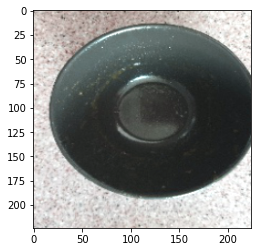

In [87]:
X_batch, y_batch = next(iter(train_dataloader))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(X_batch[0].permute(1, 2, 0).numpy() * std + mean);

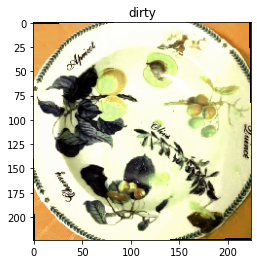

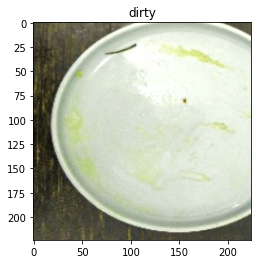

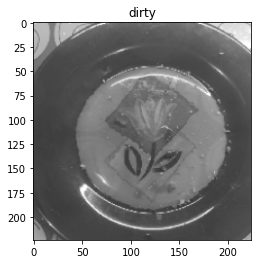

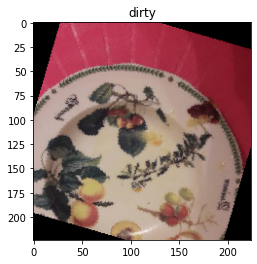

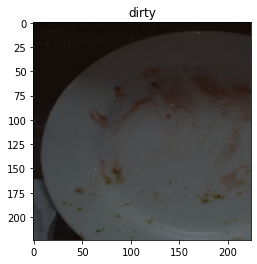

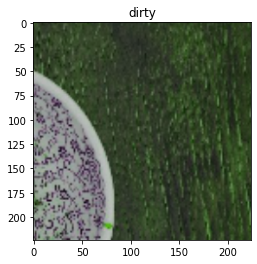

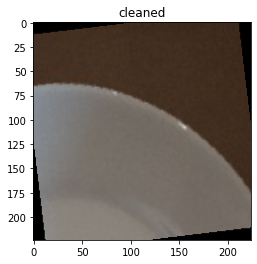

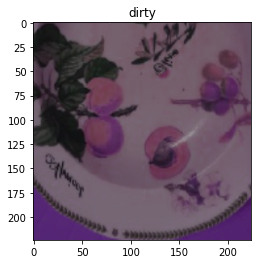

In [88]:
def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)

X_batch, y_batch = next(iter(train_dataloader))

for x_item, y_item in zip(X_batch, y_batch):
    show_input(x_item, title=class_names[y_item])

In [89]:
def train_model(model, loss, optimizer, scheduler, num_epochs, n_epochs_stop=10):
    best_acc = 0
    epochs_no_improve = best_loss = 0
    early_stop = False
    best_model = model.state_dict()
    for epoch in range(num_epochs):
        print('Epoch {}/{}:'.format(epoch, num_epochs - 1), flush=True)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                dataloader = val_dataloader
                model.eval()   # Set model to evaluate mode

            running_loss = 0.
            running_acc = 0.

            # Iterate over data.
            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # forward and backward
                with torch.set_grad_enabled(phase == 'train'):
                    preds = model(inputs)
                    loss_value = loss(preds, labels)
                    preds_class = preds.argmax(dim=1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()
                        
                        
                # save best model
                if phase == 'val':
                    acc = (preds_class == labels.data).float().mean()
                    if acc >= best_acc:
                        best_model = model.state_dict()
                        best_acc = (preds_class == labels.data).float().mean()

            
                # statistics
                running_loss += loss_value.item()
                running_acc += (preds_class == labels.data).float().mean()
                
#                 if epoch > 5 and epochs_no_improve == n_epochs_stop:
#                     print('Early stopping!' )
#                     early_stop = True
#                     break
#                 else:
#                     continue


            if early_stop:
                break
            epoch_loss = running_loss / len(dataloader)
            epoch_acc = running_acc / len(dataloader)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc), flush=True)

    return best_model, best_acc

In [90]:
model = models.resnet18(pretrained=True)

# Disable grad for all conv layers
# for param in model.parameters():
#     param.requires_grad = False

model.fc = torch.nn.Linear(model.fc.in_features, 2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-4)

# Decay LR by a factor of 0.1 every 7 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [92]:
best_acc = []
best_models = []
last_model = []
for m in [0.8, 0.9, 1.0]:
    for lr in [0.01, 0.001, 0.0001]:
        model = models.resnet34(pretrained=True)
        # Disable grad for all conv layers
        for param in model.parameters():
            param.requires_grad = False
        model.fc = torch.nn.Linear(model.fc.in_features, 2)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model = model.to(device)

        optimizer = torch.optim.SGD(model.parameters(), momentum=m, lr=lr)

        new_best_model, new_best_acc = train_model(model, loss, optimizer, scheduler, num_epochs=80, n_epochs_stop=8)
        best_acc.append(new_best_acc)
        best_models.append(new_best_model)
        last_model.append(model.state_dict())

Epoch 0/79:


/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
100%|██████████| 28/28 [00:02<00:00, 13.96it/s]

train Loss: 0.7230 Acc: 0.6250



100%|██████████| 16/16 [00:01<00:00, 11.95it/s]

val Loss: 0.2034 Acc: 0.9375
Epoch 1/79:



100%|██████████| 28/28 [00:02<00:00, 12.96it/s]

train Loss: 0.6627 Acc: 0.7679



100%|██████████| 16/16 [00:01<00:00, 11.83it/s]

val Loss: 0.6283 Acc: 0.7969
Epoch 2/79:



100%|██████████| 28/28 [00:01<00:00, 14.64it/s]

train Loss: 1.1143 Acc: 0.7098



100%|██████████| 16/16 [00:01<00:00, 12.21it/s]

val Loss: 0.0829 Acc: 0.9609
Epoch 3/79:



100%|██████████| 28/28 [00:01<00:00, 14.69it/s]

train Loss: 0.8390 Acc: 0.8036



100%|██████████| 16/16 [00:01<00:00, 12.14it/s]

val Loss: 0.7022 Acc: 0.8203
Epoch 4/79:



100%|██████████| 28/28 [00:02<00:00, 13.88it/s]

train Loss: 0.8186 Acc: 0.7411



100%|██████████| 16/16 [00:01<00:00, 11.53it/s]

val Loss: 0.2708 Acc: 0.9297
Epoch 5/79:



100%|██████████| 28/28 [00:01<00:00, 14.32it/s]


train Loss: 0.5174 Acc: 0.8616


100%|██████████| 16/16 [00:01<00:00, 12.20it/s]

val Loss: 0.1737 Acc: 0.9609
Epoch 6/79:



100%|██████████| 28/28 [00:01<00:00, 14.50it/s]

train Loss: 0.8026 Acc: 0.7946



100%|██████████| 16/16 [00:01<00:00, 12.46it/s]

val Loss: 0.4938 Acc: 0.8516
Epoch 7/79:



100%|██████████| 28/28 [00:02<00:00, 10.38it/s]

train Loss: 0.9706 Acc: 0.7768



100%|██████████| 16/16 [00:01<00:00, 10.41it/s]

val Loss: 0.6170 Acc: 0.8125


Epoch 8/79:


100%|██████████| 28/28 [00:01<00:00, 14.32it/s]

train Loss: 0.5116 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 12.02it/s]

val Loss: 0.1358 Acc: 0.9453
Epoch 9/79:



100%|██████████| 28/28 [00:01<00:00, 14.43it/s]

train Loss: 0.8545 Acc: 0.8080



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 0.3488 Acc: 0.9219
Epoch 10/79:



100%|██████████| 28/28 [00:01<00:00, 14.11it/s]

train Loss: 0.4156 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 10.42it/s]

val Loss: 0.4209 Acc: 0.9141
Epoch 11/79:



100%|██████████| 28/28 [00:01<00:00, 14.00it/s]

train Loss: 1.1459 Acc: 0.7768



100%|██████████| 16/16 [00:01<00:00, 12.23it/s]

val Loss: 0.3235 Acc: 0.9375
Epoch 12/79:



100%|██████████| 28/28 [00:01<00:00, 14.61it/s]

train Loss: 0.6468 Acc: 0.8438



100%|██████████| 16/16 [00:01<00:00, 12.14it/s]

val Loss: 0.1071 Acc: 0.9531
Epoch 13/79:



100%|██████████| 28/28 [00:02<00:00, 13.95it/s]

train Loss: 0.3119 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 12.11it/s]

val Loss: 0.6774 Acc: 0.8125
Epoch 14/79:



100%|██████████| 28/28 [00:02<00:00, 12.28it/s]

train Loss: 0.7109 Acc: 0.8080



100%|██████████| 16/16 [00:01<00:00, 12.27it/s]

val Loss: 0.5084 Acc: 0.8594
Epoch 15/79:



100%|██████████| 28/28 [00:01<00:00, 14.65it/s]

train Loss: 1.1648 Acc: 0.8080



100%|██████████| 16/16 [00:01<00:00, 12.23it/s]

val Loss: 0.1589 Acc: 0.9609
Epoch 16/79:



100%|██████████| 28/28 [00:02<00:00, 10.53it/s]

train Loss: 1.0200 Acc: 0.8125



100%|██████████| 16/16 [00:01<00:00, 11.52it/s]

val Loss: 0.2009 Acc: 0.9609
Epoch 17/79:



100%|██████████| 28/28 [00:02<00:00, 12.74it/s]

train Loss: 0.4930 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.29it/s]

val Loss: 0.1677 Acc: 0.9531
Epoch 18/79:



100%|██████████| 28/28 [00:01<00:00, 14.74it/s]

train Loss: 0.5065 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.33it/s]

val Loss: 0.0720 Acc: 0.9688
Epoch 19/79:



100%|██████████| 28/28 [00:01<00:00, 14.52it/s]

train Loss: 0.4479 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 11.86it/s]

val Loss: 0.3595 Acc: 0.8906
Epoch 20/79:



100%|██████████| 28/28 [00:02<00:00, 13.40it/s]

train Loss: 0.3690 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 0.3444 Acc: 0.8906
Epoch 21/79:



100%|██████████| 28/28 [00:01<00:00, 14.44it/s]

train Loss: 1.1293 Acc: 0.7991



100%|██████████| 16/16 [00:01<00:00, 12.17it/s]

val Loss: 0.1447 Acc: 0.9609


Epoch 22/79:


100%|██████████| 28/28 [00:01<00:00, 14.60it/s]

train Loss: 0.3096 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 11.96it/s]

val Loss: 0.1751 Acc: 0.9609
Epoch 23/79:



100%|██████████| 28/28 [00:01<00:00, 14.46it/s]

train Loss: 0.4475 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 10.58it/s]

val Loss: 0.1964 Acc: 0.9609
Epoch 24/79:



100%|██████████| 28/28 [00:01<00:00, 14.79it/s]

train Loss: 0.4031 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.56it/s]

val Loss: 0.3997 Acc: 0.9141
Epoch 25/79:



100%|██████████| 28/28 [00:01<00:00, 14.36it/s]

train Loss: 0.4707 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00,  8.46it/s]

val Loss: 0.1423 Acc: 0.9688
Epoch 26/79:



100%|██████████| 28/28 [00:01<00:00, 14.60it/s]

train Loss: 0.7318 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 11.38it/s]

val Loss: 0.2956 Acc: 0.9375
Epoch 27/79:



100%|██████████| 28/28 [00:01<00:00, 14.05it/s]

train Loss: 0.3490 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.24it/s]

val Loss: 0.0732 Acc: 0.9766


Epoch 28/79:


100%|██████████| 28/28 [00:01<00:00, 14.66it/s]

train Loss: 0.4083 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 11.77it/s]

val Loss: 0.1438 Acc: 0.9688
Epoch 29/79:



100%|██████████| 28/28 [00:01<00:00, 14.61it/s]

train Loss: 0.4758 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 12.26it/s]

val Loss: 0.2266 Acc: 0.9375
Epoch 30/79:



100%|██████████| 28/28 [00:02<00:00, 13.05it/s]

train Loss: 0.5921 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.63it/s]

val Loss: 0.2540 Acc: 0.9375
Epoch 31/79:



100%|██████████| 28/28 [00:01<00:00, 14.27it/s]

train Loss: 0.3725 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.35it/s]

val Loss: 0.1089 Acc: 0.9688
Epoch 32/79:



100%|██████████| 28/28 [00:01<00:00, 14.68it/s]

train Loss: 0.9525 Acc: 0.8214



100%|██████████| 16/16 [00:01<00:00, 12.57it/s]

val Loss: 0.0790 Acc: 0.9766
Epoch 33/79:



100%|██████████| 28/28 [00:01<00:00, 14.16it/s]

train Loss: 0.8619 Acc: 0.8348



100%|██████████| 16/16 [00:01<00:00, 10.87it/s]

val Loss: 0.3122 Acc: 0.9297
Epoch 34/79:



100%|██████████| 28/28 [00:01<00:00, 14.44it/s]

train Loss: 1.1560 Acc: 0.8170



100%|██████████| 16/16 [00:01<00:00, 12.34it/s]

val Loss: 0.1101 Acc: 0.9531
Epoch 35/79:



100%|██████████| 28/28 [00:02<00:00, 10.93it/s]

train Loss: 0.5861 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.47it/s]

val Loss: 0.1460 Acc: 0.9688
Epoch 36/79:



100%|██████████| 28/28 [00:01<00:00, 14.74it/s]

train Loss: 0.4514 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 10.66it/s]

val Loss: 0.0948 Acc: 0.9766
Epoch 37/79:



100%|██████████| 28/28 [00:01<00:00, 14.49it/s]

train Loss: 0.6757 Acc: 0.8482



100%|██████████| 16/16 [00:01<00:00, 12.25it/s]

val Loss: 0.2535 Acc: 0.9219
Epoch 38/79:



100%|██████████| 28/28 [00:01<00:00, 14.59it/s]

train Loss: 0.6436 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.45it/s]

val Loss: 0.0310 Acc: 0.9844
Epoch 39/79:



100%|██████████| 28/28 [00:01<00:00, 14.62it/s]

train Loss: 0.5744 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 11.38it/s]

val Loss: 0.0396 Acc: 0.9844
Epoch 40/79:



100%|██████████| 28/28 [00:02<00:00, 12.84it/s]

train Loss: 0.4235 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.05it/s]

val Loss: 0.6575 Acc: 0.8906


Epoch 41/79:


100%|██████████| 28/28 [00:01<00:00, 14.41it/s]

train Loss: 0.9075 Acc: 0.8393



100%|██████████| 16/16 [00:01<00:00, 12.08it/s]

val Loss: 0.0906 Acc: 0.9688


Epoch 42/79:


100%|██████████| 28/28 [00:01<00:00, 14.72it/s]

train Loss: 0.6286 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 11.86it/s]

val Loss: 0.0758 Acc: 0.9766
Epoch 43/79:



100%|██████████| 28/28 [00:02<00:00, 12.66it/s]

train Loss: 0.4029 Acc: 0.9375



100%|██████████| 16/16 [00:01<00:00, 12.18it/s]

val Loss: 0.1154 Acc: 0.9766
Epoch 44/79:



100%|██████████| 28/28 [00:02<00:00, 13.19it/s]

train Loss: 1.0493 Acc: 0.7991



100%|██████████| 16/16 [00:01<00:00, 10.30it/s]

val Loss: 0.6023 Acc: 0.8828
Epoch 45/79:



100%|██████████| 28/28 [00:01<00:00, 14.02it/s]

train Loss: 1.0182 Acc: 0.8304



100%|██████████| 16/16 [00:01<00:00, 11.93it/s]

val Loss: 0.1437 Acc: 0.9688
Epoch 46/79:



100%|██████████| 28/28 [00:02<00:00, 12.67it/s]

train Loss: 0.5392 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 11.97it/s]

val Loss: 0.1029 Acc: 0.9531
Epoch 47/79:



100%|██████████| 28/28 [00:01<00:00, 14.35it/s]

train Loss: 0.3592 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.41it/s]

val Loss: 0.0044 Acc: 1.0000
Epoch 48/79:



100%|██████████| 28/28 [00:01<00:00, 14.68it/s]

train Loss: 0.6689 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 11.76it/s]

val Loss: 0.0903 Acc: 0.9688
Epoch 49/79:



100%|██████████| 28/28 [00:01<00:00, 14.04it/s]

train Loss: 0.6028 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 10.16it/s]

val Loss: 0.2437 Acc: 0.9531
Epoch 50/79:



100%|██████████| 28/28 [00:01<00:00, 14.61it/s]

train Loss: 0.4748 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 11.96it/s]

val Loss: 0.1706 Acc: 0.9688
Epoch 51/79:



100%|██████████| 28/28 [00:01<00:00, 14.37it/s]

train Loss: 0.5402 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 11.66it/s]

val Loss: 0.1116 Acc: 0.9688
Epoch 52/79:



100%|██████████| 28/28 [00:01<00:00, 14.49it/s]

train Loss: 0.3669 Acc: 0.9241



100%|██████████| 16/16 [00:01<00:00, 11.34it/s]

val Loss: 0.3402 Acc: 0.9219
Epoch 53/79:



100%|██████████| 28/28 [00:02<00:00, 13.81it/s]

train Loss: 0.6622 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00,  8.88it/s]

val Loss: 0.0208 Acc: 0.9844
Epoch 54/79:



100%|██████████| 28/28 [00:01<00:00, 14.76it/s]

train Loss: 0.3176 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.37it/s]

val Loss: 0.2240 Acc: 0.9531
Epoch 55/79:



100%|██████████| 28/28 [00:01<00:00, 14.35it/s]

train Loss: 1.0232 Acc: 0.8259



100%|██████████| 16/16 [00:01<00:00, 12.18it/s]

val Loss: 0.4353 Acc: 0.9141


Epoch 56/79:


100%|██████████| 28/28 [00:02<00:00, 12.75it/s]

train Loss: 1.1762 Acc: 0.7946



100%|██████████| 16/16 [00:01<00:00, 12.48it/s]

val Loss: 0.4141 Acc: 0.9141
Epoch 57/79:



100%|██████████| 28/28 [00:01<00:00, 14.99it/s]

train Loss: 0.4215 Acc: 0.9330



100%|██████████| 16/16 [00:01<00:00, 12.55it/s]

val Loss: 0.1393 Acc: 0.9531
Epoch 58/79:



100%|██████████| 28/28 [00:01<00:00, 14.16it/s]

train Loss: 0.6815 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 12.17it/s]

val Loss: 0.3425 Acc: 0.9297
Epoch 59/79:



100%|██████████| 28/28 [00:02<00:00, 13.36it/s]

train Loss: 0.3427 Acc: 0.9241



100%|██████████| 16/16 [00:01<00:00, 12.42it/s]

val Loss: 0.3155 Acc: 0.9453
Epoch 60/79:



100%|██████████| 28/28 [00:01<00:00, 14.62it/s]

train Loss: 0.5110 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.44it/s]

val Loss: 0.2876 Acc: 0.9375
Epoch 61/79:



100%|██████████| 28/28 [00:01<00:00, 14.51it/s]

train Loss: 0.4762 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 12.42it/s]

val Loss: 0.2235 Acc: 0.9688
Epoch 62/79:



100%|██████████| 28/28 [00:01<00:00, 14.64it/s]

train Loss: 0.2166 Acc: 0.9464



100%|██████████| 16/16 [00:01<00:00, 10.77it/s]

val Loss: 0.0776 Acc: 0.9766
Epoch 63/79:



100%|██████████| 28/28 [00:02<00:00, 10.90it/s]

train Loss: 0.7655 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 12.36it/s]

val Loss: 0.2872 Acc: 0.9375
Epoch 64/79:



100%|██████████| 28/28 [00:01<00:00, 14.38it/s]

train Loss: 0.4514 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 0.1657 Acc: 0.9609
Epoch 65/79:



100%|██████████| 28/28 [00:01<00:00, 14.72it/s]

train Loss: 0.4061 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 10.87it/s]

val Loss: 0.0784 Acc: 0.9688
Epoch 66/79:



100%|██████████| 28/28 [00:01<00:00, 14.41it/s]

train Loss: 0.5406 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 0.3273 Acc: 0.9141
Epoch 67/79:



100%|██████████| 28/28 [00:01<00:00, 14.80it/s]

train Loss: 0.5479 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.13it/s]

val Loss: 0.0321 Acc: 0.9922


Epoch 68/79:


100%|██████████| 28/28 [00:01<00:00, 14.73it/s]

train Loss: 0.4589 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.14it/s]

val Loss: 0.0625 Acc: 0.9609
Epoch 69/79:



100%|██████████| 28/28 [00:02<00:00, 12.83it/s]

train Loss: 0.5410 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 12.21it/s]

val Loss: 0.3396 Acc: 0.9375
Epoch 70/79:



100%|██████████| 28/28 [00:01<00:00, 14.59it/s]

train Loss: 0.4770 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 11.95it/s]

val Loss: 0.0881 Acc: 0.9688
Epoch 71/79:



100%|██████████| 28/28 [00:01<00:00, 14.64it/s]

train Loss: 0.3826 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.13it/s]

val Loss: 0.4033 Acc: 0.9141
Epoch 72/79:



100%|██████████| 28/28 [00:02<00:00, 13.97it/s]

train Loss: 0.4642 Acc: 0.8884



100%|██████████| 16/16 [00:02<00:00,  7.93it/s]

val Loss: 0.8255 Acc: 0.8594
Epoch 73/79:



100%|██████████| 28/28 [00:02<00:00, 13.98it/s]

train Loss: 0.3778 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.34it/s]

val Loss: 0.0928 Acc: 0.9844
Epoch 74/79:



100%|██████████| 28/28 [00:01<00:00, 14.82it/s]

train Loss: 1.0394 Acc: 0.8170



100%|██████████| 16/16 [00:01<00:00, 12.36it/s]

val Loss: 0.2702 Acc: 0.9297
Epoch 75/79:



100%|██████████| 28/28 [00:01<00:00, 14.81it/s]

train Loss: 0.4210 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 10.52it/s]

val Loss: 0.4179 Acc: 0.8984
Epoch 76/79:



100%|██████████| 28/28 [00:01<00:00, 14.58it/s]


train Loss: 0.3407 Acc: 0.9196


100%|██████████| 16/16 [00:01<00:00, 12.46it/s]

val Loss: 0.4879 Acc: 0.9219
Epoch 77/79:



100%|██████████| 28/28 [00:01<00:00, 14.52it/s]

train Loss: 0.8209 Acc: 0.8393



100%|██████████| 16/16 [00:01<00:00, 12.46it/s]

val Loss: 0.1973 Acc: 0.9609
Epoch 78/79:



100%|██████████| 28/28 [00:01<00:00, 14.75it/s]

train Loss: 1.1465 Acc: 0.7813



100%|██████████| 16/16 [00:01<00:00, 11.75it/s]

val Loss: 0.5460 Acc: 0.9141
Epoch 79/79:



100%|██████████| 28/28 [00:02<00:00, 13.28it/s]

train Loss: 0.3161 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.60it/s]

val Loss: 0.1462 Acc: 0.9609


Epoch 0/79:


100%|██████████| 28/28 [00:01<00:00, 14.52it/s]

train Loss: 0.6793 Acc: 0.5893



100%|██████████| 16/16 [00:01<00:00, 12.75it/s]

val Loss: 0.5419 Acc: 0.7656
Epoch 1/79:



100%|██████████| 28/28 [00:01<00:00, 14.29it/s]

train Loss: 0.5027 Acc: 0.7679



100%|██████████| 16/16 [00:01<00:00, 12.35it/s]

val Loss: 0.4780 Acc: 0.7734
Epoch 2/79:



100%|██████████| 28/28 [00:02<00:00,  9.87it/s]

train Loss: 0.5297 Acc: 0.7366



100%|██████████| 16/16 [00:01<00:00, 12.32it/s]

val Loss: 0.3965 Acc: 0.8125
Epoch 3/79:



100%|██████████| 28/28 [00:01<00:00, 14.83it/s]

train Loss: 0.5213 Acc: 0.7366



100%|██████████| 16/16 [00:01<00:00, 10.10it/s]

val Loss: 0.3609 Acc: 0.8359
Epoch 4/79:



100%|██████████| 28/28 [00:01<00:00, 14.35it/s]

train Loss: 0.4237 Acc: 0.7857



100%|██████████| 16/16 [00:01<00:00, 12.20it/s]

val Loss: 0.3392 Acc: 0.8438
Epoch 5/79:



100%|██████████| 28/28 [00:02<00:00, 13.04it/s]

train Loss: 0.3163 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.10it/s]

val Loss: 0.3070 Acc: 0.8672
Epoch 6/79:



100%|██████████| 28/28 [00:01<00:00, 14.72it/s]

train Loss: 0.3939 Acc: 0.8348



100%|██████████| 16/16 [00:01<00:00, 12.15it/s]

val Loss: 0.2351 Acc: 0.9297
Epoch 7/79:



100%|██████████| 28/28 [00:01<00:00, 14.01it/s]

train Loss: 0.4054 Acc: 0.8348



100%|██████████| 16/16 [00:01<00:00, 12.07it/s]

val Loss: 0.1999 Acc: 0.9531
Epoch 8/79:



100%|██████████| 28/28 [00:02<00:00, 12.67it/s]

train Loss: 0.3397 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 11.70it/s]

val Loss: 0.2339 Acc: 0.9297
Epoch 9/79:



100%|██████████| 28/28 [00:01<00:00, 14.38it/s]

train Loss: 0.3195 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 0.1937 Acc: 0.9688


Epoch 10/79:


100%|██████████| 28/28 [00:01<00:00, 14.51it/s]

train Loss: 0.3369 Acc: 0.8214



100%|██████████| 16/16 [00:01<00:00, 12.15it/s]

val Loss: 0.2457 Acc: 0.8984
Epoch 11/79:



100%|██████████| 28/28 [00:02<00:00, 10.77it/s]

train Loss: 0.3495 Acc: 0.8214



100%|██████████| 16/16 [00:01<00:00, 10.40it/s]

val Loss: 0.2022 Acc: 0.9375
Epoch 12/79:



100%|██████████| 28/28 [00:01<00:00, 14.53it/s]

train Loss: 0.2752 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 11.95it/s]

val Loss: 0.2094 Acc: 0.9062
Epoch 13/79:



100%|██████████| 28/28 [00:01<00:00, 14.37it/s]

train Loss: 0.2519 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 12.08it/s]

val Loss: 0.1892 Acc: 0.9453
Epoch 14/79:



100%|██████████| 28/28 [00:01<00:00, 14.32it/s]

train Loss: 0.3568 Acc: 0.8438



100%|██████████| 16/16 [00:01<00:00, 10.87it/s]

val Loss: 0.1693 Acc: 0.9531
Epoch 15/79:



100%|██████████| 28/28 [00:01<00:00, 14.25it/s]

train Loss: 0.2233 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 12.11it/s]

val Loss: 0.1549 Acc: 0.9609
Epoch 16/79:



100%|██████████| 28/28 [00:01<00:00, 14.57it/s]

train Loss: 0.3615 Acc: 0.8259



100%|██████████| 16/16 [00:01<00:00, 12.10it/s]

val Loss: 0.1802 Acc: 0.9375
Epoch 17/79:



100%|██████████| 28/28 [00:01<00:00, 14.36it/s]

train Loss: 0.3170 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.13it/s]

val Loss: 0.1962 Acc: 0.9219
Epoch 18/79:



100%|██████████| 28/28 [00:02<00:00, 12.57it/s]

train Loss: 0.2942 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.03it/s]

val Loss: 0.2225 Acc: 0.9219


Epoch 19/79:


100%|██████████| 28/28 [00:01<00:00, 14.29it/s]

train Loss: 0.2608 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.16it/s]

val Loss: 0.1690 Acc: 0.9141
Epoch 20/79:



100%|██████████| 28/28 [00:01<00:00, 14.35it/s]

train Loss: 0.2665 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00,  8.44it/s]

val Loss: 0.2026 Acc: 0.9141
Epoch 21/79:



100%|██████████| 28/28 [00:02<00:00, 12.54it/s]

train Loss: 0.3034 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 12.04it/s]

val Loss: 0.2220 Acc: 0.8984
Epoch 22/79:



100%|██████████| 28/28 [00:01<00:00, 14.24it/s]

train Loss: 0.2720 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.31it/s]

val Loss: 0.1287 Acc: 0.9688
Epoch 23/79:



100%|██████████| 28/28 [00:01<00:00, 14.48it/s]

train Loss: 0.2959 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.29it/s]

val Loss: 0.1637 Acc: 0.9375
Epoch 24/79:



100%|██████████| 28/28 [00:02<00:00, 13.38it/s]

train Loss: 0.2296 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 11.51it/s]


val Loss: 0.1501 Acc: 0.9453
Epoch 25/79:


100%|██████████| 28/28 [00:01<00:00, 14.66it/s]

train Loss: 0.2606 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.31it/s]

val Loss: 0.1558 Acc: 0.9453
Epoch 26/79:



100%|██████████| 28/28 [00:01<00:00, 14.61it/s]

train Loss: 0.2328 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 11.83it/s]

val Loss: 0.2127 Acc: 0.9219
Epoch 27/79:



100%|██████████| 28/28 [00:01<00:00, 14.37it/s]

train Loss: 0.3119 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 10.61it/s]

val Loss: 0.1209 Acc: 0.9531
Epoch 28/79:



100%|██████████| 28/28 [00:01<00:00, 14.77it/s]

train Loss: 0.2266 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 12.43it/s]

val Loss: 0.1521 Acc: 0.9375
Epoch 29/79:



100%|██████████| 28/28 [00:01<00:00, 14.33it/s]

train Loss: 0.2599 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.33it/s]

val Loss: 0.1089 Acc: 0.9766
Epoch 30/79:



100%|██████████| 28/28 [00:02<00:00, 10.71it/s]

train Loss: 0.2276 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 10.18it/s]

val Loss: 0.1380 Acc: 0.9766
Epoch 31/79:



100%|██████████| 28/28 [00:01<00:00, 14.36it/s]

train Loss: 0.2795 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.37it/s]

val Loss: 0.1347 Acc: 0.9531
Epoch 32/79:



100%|██████████| 28/28 [00:01<00:00, 14.47it/s]

train Loss: 0.2400 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.20it/s]

val Loss: 0.1402 Acc: 0.9609
Epoch 33/79:



100%|██████████| 28/28 [00:01<00:00, 14.09it/s]

train Loss: 0.2876 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 12.16it/s]

val Loss: 0.1331 Acc: 0.9375
Epoch 34/79:



100%|██████████| 28/28 [00:02<00:00, 12.49it/s]

train Loss: 0.3059 Acc: 0.8482



100%|██████████| 16/16 [00:01<00:00, 12.21it/s]

val Loss: 0.1638 Acc: 0.9453
Epoch 35/79:



100%|██████████| 28/28 [00:01<00:00, 14.54it/s]

train Loss: 0.2241 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.14it/s]

val Loss: 0.1167 Acc: 0.9531
Epoch 36/79:



100%|██████████| 28/28 [00:02<00:00, 13.93it/s]

train Loss: 0.2470 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.03it/s]

val Loss: 0.1214 Acc: 0.9688
Epoch 37/79:



100%|██████████| 28/28 [00:02<00:00, 12.75it/s]

train Loss: 0.3443 Acc: 0.8304



100%|██████████| 16/16 [00:01<00:00, 11.91it/s]

val Loss: 0.1499 Acc: 0.9453
Epoch 38/79:



100%|██████████| 28/28 [00:01<00:00, 14.62it/s]

train Loss: 0.2330 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.16it/s]

val Loss: 0.0911 Acc: 0.9688
Epoch 39/79:



100%|██████████| 28/28 [00:02<00:00, 10.94it/s]

train Loss: 0.2190 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 11.93it/s]

val Loss: 0.1150 Acc: 0.9609
Epoch 40/79:



100%|██████████| 28/28 [00:02<00:00, 12.84it/s]

train Loss: 0.2380 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 11.34it/s]

val Loss: 0.1109 Acc: 0.9688
Epoch 41/79:



100%|██████████| 28/28 [00:01<00:00, 14.39it/s]

train Loss: 0.3357 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 11.72it/s]

val Loss: 0.1744 Acc: 0.9375
Epoch 42/79:



100%|██████████| 28/28 [00:01<00:00, 14.10it/s]

train Loss: 0.2807 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 11.37it/s]

val Loss: 0.1311 Acc: 0.9844
Epoch 43/79:



100%|██████████| 28/28 [00:01<00:00, 14.17it/s]

train Loss: 0.2627 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 10.60it/s]

val Loss: 0.0904 Acc: 0.9766
Epoch 44/79:



100%|██████████| 28/28 [00:01<00:00, 14.63it/s]

train Loss: 0.2530 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.11it/s]

val Loss: 0.0926 Acc: 0.9844
Epoch 45/79:



100%|██████████| 28/28 [00:02<00:00, 13.56it/s]

train Loss: 0.3022 Acc: 0.8438



100%|██████████| 16/16 [00:01<00:00, 11.67it/s]

val Loss: 0.1051 Acc: 0.9766
Epoch 46/79:



100%|██████████| 28/28 [00:01<00:00, 14.23it/s]

train Loss: 0.1973 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 10.40it/s]

val Loss: 0.1668 Acc: 0.9219
Epoch 47/79:



100%|██████████| 28/28 [00:02<00:00, 12.98it/s]

train Loss: 0.2844 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 11.51it/s]

val Loss: 0.0936 Acc: 0.9688
Epoch 48/79:



100%|██████████| 28/28 [00:02<00:00, 11.02it/s]

train Loss: 0.1975 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 11.53it/s]

val Loss: 0.1007 Acc: 0.9609
Epoch 49/79:



100%|██████████| 28/28 [00:01<00:00, 14.27it/s]

train Loss: 0.2749 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 10.52it/s]

val Loss: 0.0964 Acc: 0.9688
Epoch 50/79:



100%|██████████| 28/28 [00:02<00:00, 13.70it/s]

train Loss: 0.2607 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 11.86it/s]

val Loss: 0.1143 Acc: 0.9688


Epoch 51/79:


100%|██████████| 28/28 [00:01<00:00, 14.15it/s]

train Loss: 0.2100 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 0.1655 Acc: 0.9375
Epoch 52/79:



100%|██████████| 28/28 [00:01<00:00, 14.38it/s]

train Loss: 0.3219 Acc: 0.8393



100%|██████████| 16/16 [00:01<00:00, 12.13it/s]

val Loss: 0.0877 Acc: 0.9844
Epoch 53/79:



100%|██████████| 28/28 [00:02<00:00, 12.44it/s]

train Loss: 0.3293 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 11.21it/s]

val Loss: 0.0667 Acc: 0.9766
Epoch 54/79:



100%|██████████| 28/28 [00:02<00:00, 13.95it/s]

train Loss: 0.3122 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 10.54it/s]

val Loss: 0.1110 Acc: 0.9766
Epoch 55/79:



100%|██████████| 28/28 [00:01<00:00, 14.16it/s]

train Loss: 0.1741 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 12.24it/s]

val Loss: 0.1242 Acc: 0.9609
Epoch 56/79:



100%|██████████| 28/28 [00:02<00:00, 12.88it/s]

train Loss: 0.2561 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 0.1222 Acc: 0.9531
Epoch 57/79:



100%|██████████| 28/28 [00:02<00:00, 13.10it/s]

train Loss: 0.1885 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00,  9.83it/s]

val Loss: 0.1094 Acc: 0.9688
Epoch 58/79:



100%|██████████| 28/28 [00:01<00:00, 14.35it/s]

train Loss: 0.2182 Acc: 0.9241



100%|██████████| 16/16 [00:01<00:00, 10.43it/s]

val Loss: 0.1279 Acc: 0.9531
Epoch 59/79:



100%|██████████| 28/28 [00:02<00:00, 11.94it/s]

train Loss: 0.2396 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 11.37it/s]

val Loss: 0.1111 Acc: 0.9609
Epoch 60/79:



100%|██████████| 28/28 [00:02<00:00, 13.75it/s]

train Loss: 0.2912 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 11.66it/s]

val Loss: 0.0790 Acc: 0.9844
Epoch 61/79:



100%|██████████| 28/28 [00:01<00:00, 14.20it/s]

train Loss: 0.2409 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 11.59it/s]

val Loss: 0.1225 Acc: 0.9609
Epoch 62/79:



100%|██████████| 28/28 [00:02<00:00, 13.17it/s]

train Loss: 0.1707 Acc: 0.9330



100%|██████████| 16/16 [00:01<00:00, 11.06it/s]

val Loss: 0.1281 Acc: 0.9453
Epoch 63/79:



100%|██████████| 28/28 [00:02<00:00, 13.99it/s]

train Loss: 0.2725 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.11it/s]

val Loss: 0.1084 Acc: 0.9609
Epoch 64/79:



100%|██████████| 28/28 [00:01<00:00, 14.28it/s]

train Loss: 0.2155 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 11.82it/s]

val Loss: 0.1097 Acc: 0.9609
Epoch 65/79:



100%|██████████| 28/28 [00:01<00:00, 14.03it/s]

train Loss: 0.2134 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 10.03it/s]

val Loss: 0.0944 Acc: 0.9844
Epoch 66/79:



100%|██████████| 28/28 [00:02<00:00, 12.87it/s]

train Loss: 0.1606 Acc: 0.9330



100%|██████████| 16/16 [00:01<00:00,  9.20it/s]

val Loss: 0.1155 Acc: 0.9453
Epoch 67/79:



100%|██████████| 28/28 [00:01<00:00, 14.25it/s]

train Loss: 0.2270 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 11.30it/s]

val Loss: 0.0708 Acc: 0.9922
Epoch 68/79:



100%|██████████| 28/28 [00:01<00:00, 14.14it/s]

train Loss: 0.1829 Acc: 0.9241



100%|██████████| 16/16 [00:01<00:00, 10.36it/s]

val Loss: 0.0865 Acc: 0.9766
Epoch 69/79:



100%|██████████| 28/28 [00:01<00:00, 14.06it/s]

train Loss: 0.2545 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 12.11it/s]

val Loss: 0.1160 Acc: 0.9688
Epoch 70/79:



100%|██████████| 28/28 [00:01<00:00, 14.02it/s]

train Loss: 0.3088 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.03it/s]


val Loss: 0.1235 Acc: 0.9688
Epoch 71/79:


100%|██████████| 28/28 [00:02<00:00, 13.43it/s]


train Loss: 0.1885 Acc: 0.9330


100%|██████████| 16/16 [00:01<00:00, 10.81it/s]

val Loss: 0.0971 Acc: 0.9609
Epoch 72/79:



100%|██████████| 28/28 [00:02<00:00, 13.67it/s]

train Loss: 0.2236 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 12.28it/s]

val Loss: 0.0699 Acc: 0.9844
Epoch 73/79:



100%|██████████| 28/28 [00:02<00:00, 13.45it/s]

train Loss: 0.1995 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 11.21it/s]

val Loss: 0.0746 Acc: 0.9688
Epoch 74/79:



100%|██████████| 28/28 [00:01<00:00, 14.03it/s]

train Loss: 0.1973 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 12.25it/s]

val Loss: 0.1919 Acc: 0.9141


Epoch 75/79:


100%|██████████| 28/28 [00:02<00:00, 12.33it/s]

train Loss: 0.3240 Acc: 0.8348



100%|██████████| 16/16 [00:01<00:00,  8.06it/s]

val Loss: 0.1134 Acc: 0.9531
Epoch 76/79:



100%|██████████| 28/28 [00:01<00:00, 14.28it/s]

train Loss: 0.2501 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 11.90it/s]

val Loss: 0.0596 Acc: 0.9844
Epoch 77/79:



100%|██████████| 28/28 [00:02<00:00, 13.76it/s]

train Loss: 0.2065 Acc: 0.9241



100%|██████████| 16/16 [00:01<00:00, 11.64it/s]

val Loss: 0.1341 Acc: 0.9453
Epoch 78/79:



100%|██████████| 28/28 [00:02<00:00, 12.30it/s]

train Loss: 0.2590 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.00it/s]

val Loss: 0.0973 Acc: 0.9688
Epoch 79/79:



100%|██████████| 28/28 [00:01<00:00, 14.12it/s]

train Loss: 0.2120 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 11.93it/s]

val Loss: 0.1082 Acc: 0.9609


Epoch 0/79:


100%|██████████| 28/28 [00:01<00:00, 14.24it/s]

train Loss: 0.7850 Acc: 0.4821



100%|██████████| 16/16 [00:01<00:00, 11.95it/s]

val Loss: 0.7970 Acc: 0.4219
Epoch 1/79:



100%|██████████| 28/28 [00:02<00:00, 12.41it/s]

train Loss: 0.7238 Acc: 0.5045



100%|██████████| 16/16 [00:01<00:00, 11.65it/s]

val Loss: 0.7207 Acc: 0.5156
Epoch 2/79:



100%|██████████| 28/28 [00:01<00:00, 14.12it/s]

train Loss: 0.7213 Acc: 0.5312



100%|██████████| 16/16 [00:01<00:00, 12.06it/s]

val Loss: 0.7243 Acc: 0.4922
Epoch 3/79:



100%|██████████| 28/28 [00:01<00:00, 14.24it/s]

train Loss: 0.7033 Acc: 0.5491



100%|██████████| 16/16 [00:01<00:00, 12.04it/s]

val Loss: 0.6507 Acc: 0.6406
Epoch 4/79:



100%|██████████| 28/28 [00:02<00:00, 12.59it/s]

train Loss: 0.6777 Acc: 0.6116



100%|██████████| 16/16 [00:01<00:00,  8.46it/s]

val Loss: 0.6375 Acc: 0.6641
Epoch 5/79:



100%|██████████| 28/28 [00:01<00:00, 14.18it/s]

train Loss: 0.6394 Acc: 0.6339



100%|██████████| 16/16 [00:01<00:00, 12.10it/s]

val Loss: 0.6098 Acc: 0.6484
Epoch 6/79:



100%|██████████| 28/28 [00:01<00:00, 14.29it/s]

train Loss: 0.6224 Acc: 0.6429



100%|██████████| 16/16 [00:01<00:00, 12.42it/s]

val Loss: 0.6052 Acc: 0.7109


Epoch 7/79:


100%|██████████| 28/28 [00:02<00:00, 13.48it/s]

train Loss: 0.6137 Acc: 0.6429



100%|██████████| 16/16 [00:01<00:00, 11.72it/s]

val Loss: 0.5181 Acc: 0.8359
Epoch 8/79:



100%|██████████| 28/28 [00:01<00:00, 14.39it/s]

train Loss: 0.5929 Acc: 0.7009



100%|██████████| 16/16 [00:01<00:00, 12.02it/s]

val Loss: 0.5608 Acc: 0.7344
Epoch 9/79:



100%|██████████| 28/28 [00:01<00:00, 14.36it/s]

train Loss: 0.5807 Acc: 0.7321



100%|██████████| 16/16 [00:01<00:00, 12.01it/s]

val Loss: 0.5026 Acc: 0.7812
Epoch 10/79:



100%|██████████| 28/28 [00:01<00:00, 14.16it/s]

train Loss: 0.5866 Acc: 0.6786



100%|██████████| 16/16 [00:01<00:00, 10.27it/s]

val Loss: 0.5073 Acc: 0.7812
Epoch 11/79:



100%|██████████| 28/28 [00:01<00:00, 14.27it/s]

train Loss: 0.5502 Acc: 0.7366



100%|██████████| 16/16 [00:01<00:00, 12.08it/s]

val Loss: 0.5057 Acc: 0.7969
Epoch 12/79:



100%|██████████| 28/28 [00:01<00:00, 14.47it/s]

train Loss: 0.5576 Acc: 0.7679



100%|██████████| 16/16 [00:01<00:00, 12.21it/s]

val Loss: 0.4740 Acc: 0.8438
Epoch 13/79:



100%|██████████| 28/28 [00:01<00:00, 14.20it/s]

train Loss: 0.5090 Acc: 0.7634



100%|██████████| 16/16 [00:01<00:00,  9.93it/s]

val Loss: 0.5002 Acc: 0.7891
Epoch 14/79:



100%|██████████| 28/28 [00:02<00:00, 10.42it/s]

train Loss: 0.5461 Acc: 0.7411



100%|██████████| 16/16 [00:01<00:00, 11.69it/s]

val Loss: 0.4534 Acc: 0.8438


Epoch 15/79:


100%|██████████| 28/28 [00:01<00:00, 14.32it/s]

train Loss: 0.5321 Acc: 0.7679



100%|██████████| 16/16 [00:01<00:00, 12.03it/s]

val Loss: 0.4551 Acc: 0.8125
Epoch 16/79:



100%|██████████| 28/28 [00:01<00:00, 14.34it/s]

train Loss: 0.4994 Acc: 0.7902



100%|██████████| 16/16 [00:01<00:00, 12.00it/s]

val Loss: 0.4453 Acc: 0.7969
Epoch 17/79:



100%|██████████| 28/28 [00:02<00:00, 12.38it/s]

train Loss: 0.5184 Acc: 0.7500



100%|██████████| 16/16 [00:01<00:00, 12.11it/s]

val Loss: 0.4196 Acc: 0.8906
Epoch 18/79:



100%|██████████| 28/28 [00:01<00:00, 14.48it/s]

train Loss: 0.4735 Acc: 0.8170



100%|██████████| 16/16 [00:01<00:00, 12.29it/s]

val Loss: 0.4384 Acc: 0.8750
Epoch 19/79:



100%|██████████| 28/28 [00:02<00:00, 13.91it/s]

train Loss: 0.4873 Acc: 0.8036



100%|██████████| 16/16 [00:01<00:00, 12.01it/s]

val Loss: 0.4306 Acc: 0.8438
Epoch 20/79:



100%|██████████| 28/28 [00:02<00:00, 12.64it/s]

train Loss: 0.5207 Acc: 0.7277



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 0.4287 Acc: 0.8203
Epoch 21/79:



100%|██████████| 28/28 [00:01<00:00, 14.51it/s]

train Loss: 0.4568 Acc: 0.8304



100%|██████████| 16/16 [00:01<00:00, 12.16it/s]

val Loss: 0.3977 Acc: 0.8828
Epoch 22/79:



100%|██████████| 28/28 [00:01<00:00, 14.17it/s]

train Loss: 0.4722 Acc: 0.8036



100%|██████████| 16/16 [00:01<00:00, 12.10it/s]

val Loss: 0.3910 Acc: 0.8828
Epoch 23/79:



100%|██████████| 28/28 [00:02<00:00, 10.05it/s]

train Loss: 0.4328 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.07it/s]

val Loss: 0.3729 Acc: 0.8750
Epoch 24/79:



100%|██████████| 28/28 [00:01<00:00, 14.27it/s]

train Loss: 0.4552 Acc: 0.8125



100%|██████████| 16/16 [00:01<00:00, 11.78it/s]

val Loss: 0.3464 Acc: 0.9297
Epoch 25/79:



100%|██████████| 28/28 [00:01<00:00, 14.05it/s]

train Loss: 0.4250 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 11.86it/s]

val Loss: 0.3486 Acc: 0.9297
Epoch 26/79:



100%|██████████| 28/28 [00:02<00:00, 13.39it/s]

train Loss: 0.4635 Acc: 0.8080



100%|██████████| 16/16 [00:01<00:00, 10.42it/s]

val Loss: 0.3713 Acc: 0.8906
Epoch 27/79:



100%|██████████| 28/28 [00:01<00:00, 14.22it/s]

train Loss: 0.4515 Acc: 0.8036



100%|██████████| 16/16 [00:01<00:00, 11.68it/s]

val Loss: 0.3526 Acc: 0.8828
Epoch 28/79:



100%|██████████| 28/28 [00:02<00:00, 13.78it/s]

train Loss: 0.4314 Acc: 0.8438



100%|██████████| 16/16 [00:01<00:00, 12.01it/s]

val Loss: 0.3417 Acc: 0.8906
Epoch 29/79:



100%|██████████| 28/28 [00:01<00:00, 14.41it/s]

train Loss: 0.4291 Acc: 0.8438



100%|██████████| 16/16 [00:01<00:00, 10.20it/s]

val Loss: 0.3580 Acc: 0.8828
Epoch 30/79:



100%|██████████| 28/28 [00:02<00:00, 13.81it/s]

train Loss: 0.4564 Acc: 0.8214



100%|██████████| 16/16 [00:01<00:00, 11.72it/s]

val Loss: 0.3608 Acc: 0.8828
Epoch 31/79:



100%|██████████| 28/28 [00:01<00:00, 14.32it/s]

train Loss: 0.4470 Acc: 0.8304



100%|██████████| 16/16 [00:01<00:00, 11.85it/s]

val Loss: 0.3329 Acc: 0.9062
Epoch 32/79:



100%|██████████| 28/28 [00:02<00:00, 10.63it/s]

train Loss: 0.4237 Acc: 0.8214



100%|██████████| 16/16 [00:01<00:00, 10.60it/s]

val Loss: 0.3346 Acc: 0.9062
Epoch 33/79:



100%|██████████| 28/28 [00:02<00:00, 13.97it/s]

train Loss: 0.4108 Acc: 0.8214



100%|██████████| 16/16 [00:01<00:00, 12.05it/s]

val Loss: 0.3180 Acc: 0.9297
Epoch 34/79:



100%|██████████| 28/28 [00:01<00:00, 14.51it/s]

train Loss: 0.4412 Acc: 0.7813



100%|██████████| 16/16 [00:01<00:00, 12.08it/s]

val Loss: 0.3407 Acc: 0.8750
Epoch 35/79:



100%|██████████| 28/28 [00:01<00:00, 14.43it/s]

train Loss: 0.4085 Acc: 0.8080



100%|██████████| 16/16 [00:01<00:00, 12.02it/s]

val Loss: 0.3242 Acc: 0.8984
Epoch 36/79:



100%|██████████| 28/28 [00:02<00:00, 12.22it/s]

train Loss: 0.4272 Acc: 0.8259



100%|██████████| 16/16 [00:01<00:00, 11.71it/s]

val Loss: 0.3189 Acc: 0.9062
Epoch 37/79:



100%|██████████| 28/28 [00:01<00:00, 14.18it/s]

train Loss: 0.4024 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.24it/s]

val Loss: 0.3260 Acc: 0.8750
Epoch 38/79:



100%|██████████| 28/28 [00:01<00:00, 14.20it/s]

train Loss: 0.4296 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 0.3085 Acc: 0.9219


Epoch 39/79:


100%|██████████| 28/28 [00:02<00:00, 12.55it/s]

train Loss: 0.3932 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.15it/s]

val Loss: 0.3090 Acc: 0.9141
Epoch 40/79:



100%|██████████| 28/28 [00:01<00:00, 14.23it/s]

train Loss: 0.3890 Acc: 0.8482



100%|██████████| 16/16 [00:01<00:00, 11.95it/s]

val Loss: 0.3181 Acc: 0.9141
Epoch 41/79:



100%|██████████| 28/28 [00:02<00:00, 12.93it/s]

train Loss: 0.4105 Acc: 0.8482



100%|██████████| 16/16 [00:01<00:00,  9.44it/s]

val Loss: 0.3229 Acc: 0.8906
Epoch 42/79:



100%|██████████| 28/28 [00:02<00:00, 12.52it/s]

train Loss: 0.3774 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 11.83it/s]

val Loss: 0.2836 Acc: 0.9453
Epoch 43/79:



100%|██████████| 28/28 [00:01<00:00, 14.38it/s]

train Loss: 0.3630 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.22it/s]

val Loss: 0.3356 Acc: 0.8906
Epoch 44/79:



100%|██████████| 28/28 [00:01<00:00, 14.46it/s]

train Loss: 0.3937 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.07it/s]

val Loss: 0.2969 Acc: 0.9219
Epoch 45/79:



100%|██████████| 28/28 [00:02<00:00, 13.82it/s]

train Loss: 0.4123 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00,  9.80it/s]

val Loss: 0.3198 Acc: 0.8984
Epoch 46/79:



100%|██████████| 28/28 [00:01<00:00, 14.02it/s]

train Loss: 0.4031 Acc: 0.8482



100%|██████████| 16/16 [00:01<00:00, 12.24it/s]

val Loss: 0.2612 Acc: 0.9609
Epoch 47/79:



100%|██████████| 28/28 [00:01<00:00, 14.56it/s]

train Loss: 0.3969 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 11.90it/s]

val Loss: 0.2775 Acc: 0.9141
Epoch 48/79:



100%|██████████| 28/28 [00:01<00:00, 14.29it/s]

train Loss: 0.3788 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 10.34it/s]

val Loss: 0.2991 Acc: 0.8984
Epoch 49/79:



100%|██████████| 28/28 [00:01<00:00, 14.01it/s]

train Loss: 0.3573 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.02it/s]

val Loss: 0.2662 Acc: 0.9219
Epoch 50/79:



100%|██████████| 28/28 [00:01<00:00, 14.23it/s]

train Loss: 0.3611 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00,  8.44it/s]

val Loss: 0.2862 Acc: 0.9219
Epoch 51/79:



100%|██████████| 28/28 [00:01<00:00, 14.33it/s]

train Loss: 0.3708 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 10.71it/s]

val Loss: 0.3282 Acc: 0.9062
Epoch 52/79:



100%|██████████| 28/28 [00:01<00:00, 14.03it/s]

train Loss: 0.3676 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 12.01it/s]

val Loss: 0.2726 Acc: 0.9609
Epoch 53/79:



100%|██████████| 28/28 [00:01<00:00, 14.28it/s]

train Loss: 0.3648 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.16it/s]

val Loss: 0.2756 Acc: 0.9219


Epoch 54/79:


100%|██████████| 28/28 [00:01<00:00, 14.05it/s]

train Loss: 0.3749 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 11.72it/s]

val Loss: 0.2518 Acc: 0.9688
Epoch 55/79:



100%|██████████| 28/28 [00:02<00:00, 12.38it/s]

train Loss: 0.3533 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.06it/s]

val Loss: 0.2756 Acc: 0.9219
Epoch 56/79:



100%|██████████| 28/28 [00:01<00:00, 14.40it/s]

train Loss: 0.3838 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 0.2778 Acc: 0.9141
Epoch 57/79:



100%|██████████| 28/28 [00:01<00:00, 14.39it/s]

train Loss: 0.3231 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.09it/s]

val Loss: 0.2815 Acc: 0.9219
Epoch 58/79:



100%|██████████| 28/28 [00:02<00:00, 13.01it/s]

train Loss: 0.3187 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.22it/s]

val Loss: 0.2377 Acc: 0.9609
Epoch 59/79:



100%|██████████| 28/28 [00:01<00:00, 14.23it/s]

train Loss: 0.3441 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 11.25it/s]

val Loss: 0.2695 Acc: 0.8984
Epoch 60/79:



100%|██████████| 28/28 [00:02<00:00, 11.06it/s]

train Loss: 0.3626 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 11.97it/s]

val Loss: 0.3033 Acc: 0.8828
Epoch 61/79:



100%|██████████| 28/28 [00:02<00:00, 13.33it/s]

train Loss: 0.3255 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 11.86it/s]

val Loss: 0.2519 Acc: 0.9297
Epoch 62/79:



100%|██████████| 28/28 [00:01<00:00, 14.17it/s]

train Loss: 0.3625 Acc: 0.8393



100%|██████████| 16/16 [00:01<00:00, 11.72it/s]

val Loss: 0.2598 Acc: 0.9141
Epoch 63/79:



100%|██████████| 28/28 [00:02<00:00, 13.89it/s]

train Loss: 0.3174 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.09it/s]

val Loss: 0.2526 Acc: 0.9453
Epoch 64/79:



100%|██████████| 28/28 [00:01<00:00, 14.26it/s]

train Loss: 0.3212 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 10.55it/s]

val Loss: 0.2422 Acc: 0.9219
Epoch 65/79:



100%|██████████| 28/28 [00:01<00:00, 14.41it/s]

train Loss: 0.3642 Acc: 0.8393



100%|██████████| 16/16 [00:01<00:00, 12.14it/s]

val Loss: 0.2543 Acc: 0.9453
Epoch 66/79:



100%|██████████| 28/28 [00:01<00:00, 14.60it/s]

train Loss: 0.4056 Acc: 0.8348



100%|██████████| 16/16 [00:01<00:00, 11.96it/s]

val Loss: 0.2393 Acc: 0.9453
Epoch 67/79:



100%|██████████| 28/28 [00:01<00:00, 14.08it/s]

train Loss: 0.3711 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 11.28it/s]

val Loss: 0.2350 Acc: 0.9375
Epoch 68/79:



100%|██████████| 28/28 [00:02<00:00, 13.31it/s]

train Loss: 0.3387 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.00it/s]

val Loss: 0.2531 Acc: 0.9219
Epoch 69/79:



100%|██████████| 28/28 [00:02<00:00, 11.20it/s]

train Loss: 0.3255 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 0.2494 Acc: 0.9375
Epoch 70/79:



100%|██████████| 28/28 [00:01<00:00, 14.56it/s]

train Loss: 0.3153 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 11.94it/s]

val Loss: 0.2468 Acc: 0.9375
Epoch 71/79:



100%|██████████| 28/28 [00:02<00:00, 12.15it/s]

train Loss: 0.3277 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 11.69it/s]

val Loss: 0.2489 Acc: 0.9219
Epoch 72/79:



100%|██████████| 28/28 [00:01<00:00, 14.00it/s]

train Loss: 0.3332 Acc: 0.8348



100%|██████████| 16/16 [00:01<00:00, 11.85it/s]

val Loss: 0.2645 Acc: 0.9062
Epoch 73/79:



100%|██████████| 28/28 [00:01<00:00, 14.38it/s]

train Loss: 0.2894 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 11.62it/s]

val Loss: 0.2197 Acc: 0.9609
Epoch 74/79:



100%|██████████| 28/28 [00:02<00:00, 12.66it/s]

train Loss: 0.3460 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.09it/s]

val Loss: 0.2452 Acc: 0.9453
Epoch 75/79:



100%|██████████| 28/28 [00:01<00:00, 14.66it/s]

train Loss: 0.3407 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 12.15it/s]

val Loss: 0.2441 Acc: 0.9375
Epoch 76/79:



100%|██████████| 28/28 [00:01<00:00, 14.63it/s]

train Loss: 0.3169 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 11.81it/s]

val Loss: 0.2289 Acc: 0.9219
Epoch 77/79:



100%|██████████| 28/28 [00:02<00:00, 13.40it/s]

train Loss: 0.3810 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 11.41it/s]

val Loss: 0.2313 Acc: 0.9297
Epoch 78/79:



100%|██████████| 28/28 [00:02<00:00, 13.11it/s]

train Loss: 0.3529 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00,  9.88it/s]

val Loss: 0.2538 Acc: 0.9141
Epoch 79/79:



100%|██████████| 28/28 [00:01<00:00, 14.44it/s]

train Loss: 0.3081 Acc: 0.9241



100%|██████████| 16/16 [00:01<00:00, 11.57it/s]

val Loss: 0.2095 Acc: 0.9531


Epoch 0/79:


100%|██████████| 28/28 [00:02<00:00, 13.44it/s]

train Loss: 1.6830 Acc: 0.5848



100%|██████████| 16/16 [00:01<00:00, 11.34it/s]

val Loss: 0.6508 Acc: 0.8125
Epoch 1/79:



100%|██████████| 28/28 [00:01<00:00, 14.58it/s]

train Loss: 1.9762 Acc: 0.7411



100%|██████████| 16/16 [00:01<00:00, 12.27it/s]

val Loss: 0.3035 Acc: 0.9062
Epoch 2/79:



100%|██████████| 28/28 [00:01<00:00, 14.83it/s]

train Loss: 1.1092 Acc: 0.8214



100%|██████████| 16/16 [00:01<00:00, 12.50it/s]

val Loss: 0.3440 Acc: 0.9062
Epoch 3/79:



100%|██████████| 28/28 [00:01<00:00, 14.48it/s]

train Loss: 3.9792 Acc: 0.6518



100%|██████████| 16/16 [00:01<00:00, 10.88it/s]

val Loss: 0.9875 Acc: 0.8516
Epoch 4/79:



100%|██████████| 28/28 [00:01<00:00, 14.11it/s]

train Loss: 1.3002 Acc: 0.8438



100%|██████████| 16/16 [00:01<00:00, 12.42it/s]

val Loss: 0.6593 Acc: 0.9141
Epoch 5/79:



100%|██████████| 28/28 [00:01<00:00, 14.56it/s]

train Loss: 1.0486 Acc: 0.8482



100%|██████████| 16/16 [00:01<00:00, 12.28it/s]

val Loss: 0.5506 Acc: 0.9141
Epoch 6/79:



100%|██████████| 28/28 [00:01<00:00, 14.20it/s]

train Loss: 0.9689 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 12.07it/s]

val Loss: 1.2545 Acc: 0.8359
Epoch 7/79:



100%|██████████| 28/28 [00:02<00:00, 12.50it/s]

train Loss: 2.4664 Acc: 0.7589



100%|██████████| 16/16 [00:01<00:00,  8.97it/s]

val Loss: 0.5224 Acc: 0.9453
Epoch 8/79:



100%|██████████| 28/28 [00:01<00:00, 14.15it/s]


train Loss: 1.8500 Acc: 0.8214


100%|██████████| 16/16 [00:01<00:00, 12.04it/s]

val Loss: 0.1825 Acc: 0.9766
Epoch 9/79:



100%|██████████| 28/28 [00:01<00:00, 14.58it/s]

train Loss: 0.7200 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 11.85it/s]

val Loss: 0.2077 Acc: 0.9766
Epoch 10/79:



100%|██████████| 28/28 [00:02<00:00, 12.89it/s]

train Loss: 0.6853 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 0.0432 Acc: 0.9766
Epoch 11/79:



100%|██████████| 28/28 [00:02<00:00, 13.70it/s]

train Loss: 0.7751 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.08it/s]

val Loss: 0.6526 Acc: 0.9375


Epoch 12/79:


100%|██████████| 28/28 [00:01<00:00, 14.34it/s]

train Loss: 2.7428 Acc: 0.7545



100%|██████████| 16/16 [00:01<00:00, 12.33it/s]

val Loss: 2.5597 Acc: 0.7031
Epoch 13/79:



100%|██████████| 28/28 [00:02<00:00, 13.34it/s]

train Loss: 1.5635 Acc: 0.8170



100%|██████████| 16/16 [00:01<00:00, 11.48it/s]

val Loss: 0.3497 Acc: 0.9453
Epoch 14/79:



100%|██████████| 28/28 [00:02<00:00, 13.66it/s]

train Loss: 0.8104 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.14it/s]

val Loss: 0.1607 Acc: 0.9297
Epoch 15/79:



100%|██████████| 28/28 [00:01<00:00, 14.18it/s]

train Loss: 0.6779 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.11it/s]

val Loss: 0.1793 Acc: 0.9609
Epoch 16/79:



100%|██████████| 28/28 [00:01<00:00, 14.43it/s]

train Loss: 0.6653 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 10.00it/s]

val Loss: 1.4851 Acc: 0.8594
Epoch 17/79:



100%|██████████| 28/28 [00:02<00:00, 11.04it/s]

train Loss: 0.8385 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 0.1107 Acc: 0.9766
Epoch 18/79:



100%|██████████| 28/28 [00:01<00:00, 14.26it/s]

train Loss: 0.5810 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.03it/s]

val Loss: 0.1238 Acc: 0.9766


Epoch 19/79:


100%|██████████| 28/28 [00:01<00:00, 14.55it/s]

train Loss: 0.6189 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 10.52it/s]

val Loss: 1.2263 Acc: 0.8828
Epoch 20/79:



100%|██████████| 28/28 [00:01<00:00, 14.22it/s]

train Loss: 2.0393 Acc: 0.7991



100%|██████████| 16/16 [00:01<00:00, 12.22it/s]

val Loss: 0.4142 Acc: 0.9609
Epoch 21/79:



100%|██████████| 28/28 [00:01<00:00, 14.59it/s]

train Loss: 4.0871 Acc: 0.7098



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 2.8786 Acc: 0.7734
Epoch 22/79:



100%|██████████| 28/28 [00:01<00:00, 14.49it/s]

train Loss: 3.1692 Acc: 0.7902



100%|██████████| 16/16 [00:01<00:00, 11.53it/s]

val Loss: 0.9985 Acc: 0.9141
Epoch 23/79:



100%|██████████| 28/28 [00:02<00:00, 12.33it/s]

train Loss: 1.1014 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.14it/s]

val Loss: 3.5370 Acc: 0.6953
Epoch 24/79:



100%|██████████| 28/28 [00:01<00:00, 14.42it/s]

train Loss: 2.7687 Acc: 0.7813



100%|██████████| 16/16 [00:01<00:00, 12.21it/s]

val Loss: 1.4046 Acc: 0.8750
Epoch 25/79:



100%|██████████| 28/28 [00:01<00:00, 14.38it/s]

train Loss: 2.9267 Acc: 0.7813



100%|██████████| 16/16 [00:01<00:00, 12.23it/s]

val Loss: 0.6726 Acc: 0.8984
Epoch 26/79:



100%|██████████| 28/28 [00:02<00:00,  9.78it/s]

train Loss: 3.4200 Acc: 0.8036



100%|██████████| 16/16 [00:01<00:00, 11.98it/s]

val Loss: 0.5388 Acc: 0.9688
Epoch 27/79:



100%|██████████| 28/28 [00:01<00:00, 14.30it/s]

train Loss: 1.2579 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.09it/s]

val Loss: 0.1449 Acc: 0.9766
Epoch 28/79:



100%|██████████| 28/28 [00:01<00:00, 14.59it/s]

train Loss: 1.2539 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.45it/s]

val Loss: 1.2309 Acc: 0.8984
Epoch 29/79:



100%|██████████| 28/28 [00:02<00:00, 13.15it/s]

train Loss: 1.1576 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.04it/s]

val Loss: 0.3115 Acc: 0.9688
Epoch 30/79:



100%|██████████| 28/28 [00:01<00:00, 14.47it/s]


train Loss: 1.6293 Acc: 0.8795


100%|██████████| 16/16 [00:01<00:00, 12.20it/s]

val Loss: 0.6485 Acc: 0.9219
Epoch 31/79:



100%|██████████| 28/28 [00:01<00:00, 14.39it/s]

train Loss: 1.6101 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 11.97it/s]

val Loss: 0.6174 Acc: 0.9141
Epoch 32/79:



100%|██████████| 28/28 [00:02<00:00, 13.85it/s]

train Loss: 0.6236 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 10.43it/s]

val Loss: 0.1737 Acc: 0.9844
Epoch 33/79:



100%|██████████| 28/28 [00:01<00:00, 14.47it/s]

train Loss: 1.0810 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.43it/s]

val Loss: 1.5396 Acc: 0.8047
Epoch 34/79:



100%|██████████| 28/28 [00:01<00:00, 14.60it/s]

train Loss: 2.2016 Acc: 0.8170



100%|██████████| 16/16 [00:01<00:00, 11.79it/s]

val Loss: 0.4593 Acc: 0.9453
Epoch 35/79:



100%|██████████| 28/28 [00:01<00:00, 14.44it/s]

train Loss: 0.4367 Acc: 0.9375



100%|██████████| 16/16 [00:02<00:00,  7.43it/s]

val Loss: 0.3702 Acc: 0.9688
Epoch 36/79:



100%|██████████| 28/28 [00:01<00:00, 14.21it/s]

train Loss: 1.1610 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.35it/s]

val Loss: 0.2793 Acc: 0.9688
Epoch 37/79:



100%|██████████| 28/28 [00:01<00:00, 14.25it/s]

train Loss: 0.6103 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 11.77it/s]

val Loss: 0.0864 Acc: 0.9688
Epoch 38/79:



100%|██████████| 28/28 [00:01<00:00, 14.42it/s]

train Loss: 1.1942 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 11.92it/s]

val Loss: 0.1777 Acc: 0.9844
Epoch 39/79:



100%|██████████| 28/28 [00:02<00:00, 12.44it/s]

train Loss: 1.0704 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.27it/s]


val Loss: 0.4250 Acc: 0.9453
Epoch 40/79:


100%|██████████| 28/28 [00:01<00:00, 14.09it/s]

train Loss: 1.1912 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 11.80it/s]

val Loss: 0.7112 Acc: 0.9297
Epoch 41/79:



100%|██████████| 28/28 [00:01<00:00, 14.37it/s]

train Loss: 1.1647 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 11.67it/s]


val Loss: 0.2015 Acc: 0.9453
Epoch 42/79:


100%|██████████| 28/28 [00:02<00:00, 12.69it/s]

train Loss: 1.7171 Acc: 0.8125



100%|██████████| 16/16 [00:01<00:00, 12.11it/s]

val Loss: 0.3105 Acc: 0.9766
Epoch 43/79:



100%|██████████| 28/28 [00:01<00:00, 14.46it/s]

train Loss: 1.9203 Acc: 0.8170



100%|██████████| 16/16 [00:01<00:00, 12.17it/s]

val Loss: 1.4981 Acc: 0.8672
Epoch 44/79:



100%|██████████| 28/28 [00:01<00:00, 14.40it/s]

train Loss: 0.6809 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 10.72it/s]

val Loss: 0.8252 Acc: 0.9375
Epoch 45/79:



100%|██████████| 28/28 [00:02<00:00, 10.85it/s]

train Loss: 1.1816 Acc: 0.8438



100%|██████████| 16/16 [00:01<00:00, 12.37it/s]


val Loss: 0.6393 Acc: 0.9453
Epoch 46/79:


100%|██████████| 28/28 [00:01<00:00, 14.38it/s]

train Loss: 0.8879 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.17it/s]

val Loss: 0.1900 Acc: 0.9531
Epoch 47/79:



100%|██████████| 28/28 [00:01<00:00, 14.74it/s]

train Loss: 0.9805 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 12.02it/s]

val Loss: 0.0652 Acc: 0.9688
Epoch 48/79:



100%|██████████| 28/28 [00:01<00:00, 14.56it/s]

train Loss: 0.9903 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 10.32it/s]

val Loss: 0.0546 Acc: 0.9844
Epoch 49/79:



100%|██████████| 28/28 [00:01<00:00, 14.33it/s]

train Loss: 1.5264 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 12.03it/s]

val Loss: 0.8284 Acc: 0.8984
Epoch 50/79:



100%|██████████| 28/28 [00:01<00:00, 14.56it/s]

train Loss: 1.0640 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.35it/s]

val Loss: 2.2043 Acc: 0.8359
Epoch 51/79:



100%|██████████| 28/28 [00:01<00:00, 14.83it/s]

train Loss: 2.6211 Acc: 0.7634



100%|██████████| 16/16 [00:01<00:00, 11.61it/s]

val Loss: 0.0708 Acc: 0.9922
Epoch 52/79:



100%|██████████| 28/28 [00:02<00:00, 13.23it/s]

train Loss: 1.2394 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 11.85it/s]

val Loss: 0.0904 Acc: 0.9688
Epoch 53/79:



100%|██████████| 28/28 [00:01<00:00, 14.47it/s]

train Loss: 0.9855 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 11.97it/s]

val Loss: 0.2496 Acc: 0.9766
Epoch 54/79:



100%|██████████| 28/28 [00:02<00:00, 10.91it/s]

train Loss: 1.0824 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.35it/s]

val Loss: 0.6550 Acc: 0.9141
Epoch 55/79:



100%|██████████| 28/28 [00:02<00:00, 12.59it/s]

train Loss: 2.3536 Acc: 0.7902



100%|██████████| 16/16 [00:01<00:00, 12.03it/s]

val Loss: 0.8677 Acc: 0.8750
Epoch 56/79:



100%|██████████| 28/28 [00:01<00:00, 14.69it/s]

train Loss: 1.3324 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 11.96it/s]

val Loss: 0.8567 Acc: 0.9141
Epoch 57/79:



100%|██████████| 28/28 [00:01<00:00, 14.46it/s]

train Loss: 1.6676 Acc: 0.8304



100%|██████████| 16/16 [00:01<00:00, 11.92it/s]

val Loss: 1.4284 Acc: 0.8828
Epoch 58/79:



100%|██████████| 28/28 [00:02<00:00, 12.77it/s]

train Loss: 1.3878 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.06it/s]

val Loss: 0.1976 Acc: 0.9688
Epoch 59/79:



100%|██████████| 28/28 [00:01<00:00, 14.53it/s]

train Loss: 1.5705 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 12.03it/s]

val Loss: 0.1436 Acc: 0.9844
Epoch 60/79:



100%|██████████| 28/28 [00:01<00:00, 14.30it/s]

train Loss: 0.9150 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.20it/s]

val Loss: 0.2664 Acc: 0.9688
Epoch 61/79:



100%|██████████| 28/28 [00:02<00:00, 13.59it/s]

train Loss: 0.6684 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 10.58it/s]

val Loss: 0.0996 Acc: 0.9766
Epoch 62/79:



100%|██████████| 28/28 [00:01<00:00, 14.55it/s]

train Loss: 0.8794 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 11.93it/s]

val Loss: 0.1283 Acc: 0.9688
Epoch 63/79:



100%|██████████| 28/28 [00:02<00:00, 13.77it/s]

train Loss: 1.4215 Acc: 0.8438



100%|██████████| 16/16 [00:01<00:00,  8.47it/s]

val Loss: 0.2351 Acc: 0.9609
Epoch 64/79:



100%|██████████| 28/28 [00:01<00:00, 14.23it/s]

train Loss: 0.4173 Acc: 0.9241



100%|██████████| 16/16 [00:01<00:00, 10.58it/s]

val Loss: 0.0481 Acc: 0.9922
Epoch 65/79:



100%|██████████| 28/28 [00:01<00:00, 14.75it/s]

train Loss: 0.7708 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.39it/s]

val Loss: 0.1337 Acc: 0.9688
Epoch 66/79:



100%|██████████| 28/28 [00:01<00:00, 14.33it/s]

train Loss: 1.0608 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 11.73it/s]

val Loss: 0.9780 Acc: 0.9062
Epoch 67/79:



100%|██████████| 28/28 [00:01<00:00, 14.37it/s]

train Loss: 1.8392 Acc: 0.8170



100%|██████████| 16/16 [00:01<00:00, 11.69it/s]

val Loss: 0.3297 Acc: 0.9766
Epoch 68/79:



100%|██████████| 28/28 [00:02<00:00, 13.75it/s]

train Loss: 0.5082 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 12.28it/s]

val Loss: 0.2752 Acc: 0.9688
Epoch 69/79:



100%|██████████| 28/28 [00:01<00:00, 14.43it/s]

train Loss: 0.8137 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 11.78it/s]

val Loss: 0.6295 Acc: 0.9219


Epoch 70/79:


100%|██████████| 28/28 [00:01<00:00, 14.29it/s]

train Loss: 0.7429 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 12.14it/s]

val Loss: 0.0894 Acc: 0.9922
Epoch 71/79:



100%|██████████| 28/28 [00:02<00:00, 12.81it/s]

train Loss: 1.6350 Acc: 0.8348



100%|██████████| 16/16 [00:01<00:00, 12.20it/s]

val Loss: 1.1369 Acc: 0.9062
Epoch 72/79:



100%|██████████| 28/28 [00:01<00:00, 14.80it/s]

train Loss: 1.8462 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 10.47it/s]

val Loss: 0.9815 Acc: 0.8906
Epoch 73/79:



100%|██████████| 28/28 [00:02<00:00, 11.81it/s]

train Loss: 1.5682 Acc: 0.8438



100%|██████████| 16/16 [00:01<00:00, 12.00it/s]

val Loss: 0.0264 Acc: 0.9844
Epoch 74/79:



100%|██████████| 28/28 [00:02<00:00, 12.82it/s]

train Loss: 1.7554 Acc: 0.8482



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 0.9097 Acc: 0.9141
Epoch 75/79:



100%|██████████| 28/28 [00:01<00:00, 14.32it/s]

train Loss: 1.8641 Acc: 0.8482



100%|██████████| 16/16 [00:01<00:00, 12.21it/s]

val Loss: 0.2913 Acc: 0.9609


Epoch 76/79:


100%|██████████| 28/28 [00:01<00:00, 14.36it/s]

train Loss: 1.1383 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.15it/s]

val Loss: 0.0688 Acc: 0.9844
Epoch 77/79:



100%|██████████| 28/28 [00:02<00:00, 13.88it/s]

train Loss: 1.3575 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 10.80it/s]

val Loss: 0.5872 Acc: 0.9375
Epoch 78/79:



100%|██████████| 28/28 [00:01<00:00, 14.21it/s]

train Loss: 1.0815 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.00it/s]

val Loss: 0.8152 Acc: 0.9375
Epoch 79/79:



100%|██████████| 28/28 [00:02<00:00, 13.98it/s]

train Loss: 0.7098 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 12.21it/s]


val Loss: 0.2862 Acc: 0.9609
Epoch 0/79:


100%|██████████| 28/28 [00:01<00:00, 14.65it/s]

train Loss: 0.6596 Acc: 0.5893



100%|██████████| 16/16 [00:01<00:00, 10.80it/s]

val Loss: 0.5421 Acc: 0.6484
Epoch 1/79:



100%|██████████| 28/28 [00:01<00:00, 14.08it/s]

train Loss: 0.5789 Acc: 0.7054



100%|██████████| 16/16 [00:01<00:00, 12.27it/s]

val Loss: 0.3072 Acc: 0.8828
Epoch 2/79:



100%|██████████| 28/28 [00:02<00:00, 10.61it/s]

train Loss: 0.4379 Acc: 0.7902



100%|██████████| 16/16 [00:01<00:00, 12.15it/s]

val Loss: 0.3348 Acc: 0.8906
Epoch 3/79:



100%|██████████| 28/28 [00:01<00:00, 14.45it/s]

train Loss: 0.4108 Acc: 0.8125



100%|██████████| 16/16 [00:01<00:00, 10.88it/s]

val Loss: 0.2169 Acc: 0.9375
Epoch 4/79:



100%|██████████| 28/28 [00:02<00:00, 13.81it/s]

train Loss: 0.2770 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 0.2801 Acc: 0.8906
Epoch 5/79:



100%|██████████| 28/28 [00:01<00:00, 14.46it/s]

train Loss: 0.3284 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.10it/s]

val Loss: 0.2328 Acc: 0.9219
Epoch 6/79:



100%|██████████| 28/28 [00:01<00:00, 14.51it/s]

train Loss: 0.4485 Acc: 0.8304



100%|██████████| 16/16 [00:01<00:00, 12.13it/s]

val Loss: 0.1797 Acc: 0.9453
Epoch 7/79:



100%|██████████| 28/28 [00:02<00:00, 12.36it/s]

train Loss: 0.3796 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 0.1584 Acc: 0.9453
Epoch 8/79:



100%|██████████| 28/28 [00:01<00:00, 14.82it/s]

train Loss: 0.2671 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.21it/s]

val Loss: 0.1810 Acc: 0.9453
Epoch 9/79:



100%|██████████| 28/28 [00:01<00:00, 14.66it/s]

train Loss: 0.2768 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.29it/s]

val Loss: 0.1579 Acc: 0.9453
Epoch 10/79:



100%|██████████| 28/28 [00:02<00:00, 12.72it/s]

train Loss: 0.2954 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 0.1746 Acc: 0.9375
Epoch 11/79:



100%|██████████| 28/28 [00:02<00:00, 13.22it/s]

train Loss: 0.2622 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 10.06it/s]

val Loss: 0.1290 Acc: 0.9688
Epoch 12/79:



100%|██████████| 28/28 [00:01<00:00, 14.55it/s]

train Loss: 0.3285 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.05it/s]

val Loss: 0.2688 Acc: 0.8984
Epoch 13/79:



100%|██████████| 28/28 [00:02<00:00, 13.12it/s]

train Loss: 0.4646 Acc: 0.8170



100%|██████████| 16/16 [00:01<00:00, 11.83it/s]

val Loss: 0.1765 Acc: 0.9375
Epoch 14/79:



100%|██████████| 28/28 [00:01<00:00, 14.56it/s]

train Loss: 0.2547 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.34it/s]

val Loss: 0.1314 Acc: 0.9531
Epoch 15/79:



100%|██████████| 28/28 [00:01<00:00, 14.64it/s]

train Loss: 0.2255 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 11.90it/s]

val Loss: 0.1242 Acc: 0.9609
Epoch 16/79:



100%|██████████| 28/28 [00:01<00:00, 14.38it/s]

train Loss: 0.2050 Acc: 0.9375



100%|██████████| 16/16 [00:01<00:00, 10.17it/s]

val Loss: 0.1660 Acc: 0.9297
Epoch 17/79:



100%|██████████| 28/28 [00:01<00:00, 14.47it/s]

train Loss: 0.2884 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.10it/s]

val Loss: 0.1369 Acc: 0.9531
Epoch 18/79:



100%|██████████| 28/28 [00:01<00:00, 14.81it/s]

train Loss: 0.2708 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 0.1052 Acc: 0.9766


Epoch 19/79:


100%|██████████| 28/28 [00:01<00:00, 14.21it/s]

train Loss: 0.2429 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.00it/s]

val Loss: 0.2112 Acc: 0.9297
Epoch 20/79:



100%|██████████| 28/28 [00:02<00:00, 12.52it/s]

train Loss: 0.1860 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00,  9.64it/s]

val Loss: 0.1607 Acc: 0.9297
Epoch 21/79:



100%|██████████| 28/28 [00:01<00:00, 14.03it/s]

train Loss: 0.3870 Acc: 0.8393



100%|██████████| 16/16 [00:01<00:00, 11.94it/s]

val Loss: 0.3189 Acc: 0.8750
Epoch 22/79:



100%|██████████| 28/28 [00:01<00:00, 14.41it/s]

train Loss: 0.3700 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.14it/s]

val Loss: 0.1864 Acc: 0.9062


Epoch 23/79:


100%|██████████| 28/28 [00:02<00:00, 12.91it/s]

train Loss: 0.2194 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.36it/s]

val Loss: 0.1043 Acc: 0.9531
Epoch 24/79:



100%|██████████| 28/28 [00:01<00:00, 14.83it/s]

train Loss: 0.2754 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 11.97it/s]

val Loss: 0.1109 Acc: 0.9531
Epoch 25/79:



100%|██████████| 28/28 [00:01<00:00, 14.37it/s]

train Loss: 0.1546 Acc: 0.9598



100%|██████████| 16/16 [00:01<00:00, 11.68it/s]

val Loss: 0.0905 Acc: 0.9844
Epoch 26/79:



100%|██████████| 28/28 [00:02<00:00, 13.44it/s]

train Loss: 0.2733 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 11.70it/s]

val Loss: 0.1469 Acc: 0.9453
Epoch 27/79:



100%|██████████| 28/28 [00:01<00:00, 14.44it/s]

train Loss: 0.2475 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 0.1267 Acc: 0.9688


Epoch 28/79:


100%|██████████| 28/28 [00:01<00:00, 14.18it/s]

train Loss: 0.1862 Acc: 0.9330



100%|██████████| 16/16 [00:01<00:00, 12.49it/s]

val Loss: 0.0972 Acc: 0.9609
Epoch 29/79:



100%|██████████| 28/28 [00:01<00:00, 14.18it/s]

train Loss: 0.2412 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 10.54it/s]

val Loss: 0.1488 Acc: 0.9375
Epoch 30/79:



100%|██████████| 28/28 [00:02<00:00, 10.70it/s]

train Loss: 0.2906 Acc: 0.8482



100%|██████████| 16/16 [00:01<00:00, 12.09it/s]

val Loss: 0.1186 Acc: 0.9453
Epoch 31/79:



100%|██████████| 28/28 [00:01<00:00, 14.38it/s]

train Loss: 0.2917 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 11.98it/s]

val Loss: 0.1357 Acc: 0.9609
Epoch 32/79:



100%|██████████| 28/28 [00:01<00:00, 14.58it/s]

train Loss: 0.2387 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 10.97it/s]

val Loss: 0.1065 Acc: 0.9609
Epoch 33/79:



100%|██████████| 28/28 [00:01<00:00, 14.15it/s]

train Loss: 0.2456 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 11.86it/s]

val Loss: 0.1223 Acc: 0.9375
Epoch 34/79:



100%|██████████| 28/28 [00:01<00:00, 14.31it/s]

train Loss: 0.1759 Acc: 0.9464



100%|██████████| 16/16 [00:01<00:00, 12.23it/s]

val Loss: 0.0981 Acc: 0.9609
Epoch 35/79:



100%|██████████| 28/28 [00:01<00:00, 14.50it/s]

train Loss: 0.1890 Acc: 0.9330



100%|██████████| 16/16 [00:01<00:00, 11.91it/s]

val Loss: 0.1143 Acc: 0.9531
Epoch 36/79:



100%|██████████| 28/28 [00:02<00:00, 12.49it/s]

train Loss: 0.3581 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.18it/s]

val Loss: 0.2058 Acc: 0.9219
Epoch 37/79:



100%|██████████| 28/28 [00:01<00:00, 14.29it/s]

train Loss: 0.3037 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.28it/s]

val Loss: 0.0732 Acc: 0.9766
Epoch 38/79:



100%|██████████| 28/28 [00:01<00:00, 14.36it/s]

train Loss: 0.2374 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.24it/s]

val Loss: 0.1075 Acc: 0.9609
Epoch 39/79:



100%|██████████| 28/28 [00:02<00:00, 11.64it/s]

train Loss: 0.2744 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 10.10it/s]

val Loss: 0.2682 Acc: 0.8750
Epoch 40/79:



100%|██████████| 28/28 [00:01<00:00, 14.34it/s]


train Loss: 0.2851 Acc: 0.8750


100%|██████████| 16/16 [00:01<00:00, 12.59it/s]

val Loss: 0.2731 Acc: 0.8984
Epoch 41/79:



100%|██████████| 28/28 [00:01<00:00, 14.56it/s]

train Loss: 0.2172 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.30it/s]

val Loss: 0.0737 Acc: 0.9844
Epoch 42/79:



100%|██████████| 28/28 [00:02<00:00, 13.80it/s]

train Loss: 0.2589 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 10.63it/s]

val Loss: 0.1018 Acc: 0.9609
Epoch 43/79:



100%|██████████| 28/28 [00:01<00:00, 14.44it/s]

train Loss: 0.3521 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.15it/s]

val Loss: 0.0852 Acc: 0.9766
Epoch 44/79:



100%|██████████| 28/28 [00:01<00:00, 14.39it/s]

train Loss: 0.2860 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 12.13it/s]

val Loss: 0.0926 Acc: 0.9688
Epoch 45/79:



100%|██████████| 28/28 [00:01<00:00, 14.21it/s]

train Loss: 0.1368 Acc: 0.9688



100%|██████████| 16/16 [00:01<00:00, 10.73it/s]

val Loss: 0.1369 Acc: 0.9531
Epoch 46/79:



100%|██████████| 28/28 [00:01<00:00, 14.14it/s]

train Loss: 0.2898 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 12.16it/s]

val Loss: 0.0823 Acc: 0.9688
Epoch 47/79:



100%|██████████| 28/28 [00:01<00:00, 14.58it/s]

train Loss: 0.2432 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 0.0586 Acc: 0.9844
Epoch 48/79:



100%|██████████| 28/28 [00:01<00:00, 14.26it/s]

train Loss: 0.2814 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00,  9.63it/s]

val Loss: 0.1518 Acc: 0.9297
Epoch 49/79:



100%|██████████| 28/28 [00:02<00:00, 11.12it/s]

train Loss: 0.1776 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 12.11it/s]


val Loss: 0.1049 Acc: 0.9688
Epoch 50/79:


100%|██████████| 28/28 [00:01<00:00, 14.36it/s]

train Loss: 0.2826 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 11.74it/s]

val Loss: 0.1488 Acc: 0.9531
Epoch 51/79:



100%|██████████| 28/28 [00:01<00:00, 14.29it/s]

train Loss: 0.2060 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 11.74it/s]

val Loss: 0.0344 Acc: 1.0000
Epoch 52/79:



100%|██████████| 28/28 [00:02<00:00, 12.32it/s]

train Loss: 0.1931 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 11.93it/s]

val Loss: 0.0639 Acc: 0.9766
Epoch 53/79:



100%|██████████| 28/28 [00:01<00:00, 14.36it/s]

train Loss: 0.2392 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 11.86it/s]

val Loss: 0.1049 Acc: 0.9531
Epoch 54/79:



100%|██████████| 28/28 [00:01<00:00, 14.18it/s]

train Loss: 0.2180 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 11.95it/s]


val Loss: 0.0665 Acc: 0.9766
Epoch 55/79:


100%|██████████| 28/28 [00:02<00:00, 12.61it/s]

train Loss: 0.2965 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.21it/s]


val Loss: 0.1731 Acc: 0.9297
Epoch 56/79:


100%|██████████| 28/28 [00:01<00:00, 14.62it/s]

train Loss: 0.2690 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.15it/s]

val Loss: 0.1410 Acc: 0.9453
Epoch 57/79:



100%|██████████| 28/28 [00:02<00:00, 13.92it/s]

train Loss: 0.2614 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.27it/s]

val Loss: 0.1247 Acc: 0.9453
Epoch 58/79:



100%|██████████| 28/28 [00:02<00:00, 10.23it/s]

train Loss: 0.3261 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.58it/s]

val Loss: 0.0674 Acc: 0.9844
Epoch 59/79:



100%|██████████| 28/28 [00:01<00:00, 14.40it/s]

train Loss: 0.2669 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.47it/s]

val Loss: 0.0554 Acc: 0.9844
Epoch 60/79:



100%|██████████| 28/28 [00:01<00:00, 14.37it/s]

train Loss: 0.2138 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 11.97it/s]

val Loss: 0.1253 Acc: 0.9531
Epoch 61/79:



100%|██████████| 28/28 [00:01<00:00, 14.35it/s]

train Loss: 0.2089 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 10.68it/s]

val Loss: 0.1531 Acc: 0.9609
Epoch 62/79:



100%|██████████| 28/28 [00:01<00:00, 14.58it/s]

train Loss: 0.2154 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 12.03it/s]

val Loss: 0.0769 Acc: 0.9688
Epoch 63/79:



100%|██████████| 28/28 [00:01<00:00, 14.57it/s]

train Loss: 0.1686 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 11.79it/s]

val Loss: 0.0659 Acc: 0.9844
Epoch 64/79:



100%|██████████| 28/28 [00:01<00:00, 14.17it/s]

train Loss: 0.3855 Acc: 0.8348



100%|██████████| 16/16 [00:01<00:00, 11.75it/s]

val Loss: 0.0839 Acc: 0.9766
Epoch 65/79:



100%|██████████| 28/28 [00:02<00:00, 12.87it/s]

train Loss: 0.4289 Acc: 0.8080



100%|██████████| 16/16 [00:01<00:00, 12.49it/s]

val Loss: 0.1222 Acc: 0.9609


Epoch 66/79:


100%|██████████| 28/28 [00:01<00:00, 14.78it/s]

train Loss: 0.2851 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.11it/s]

val Loss: 0.0677 Acc: 0.9766
Epoch 67/79:



100%|██████████| 28/28 [00:02<00:00, 12.71it/s]

train Loss: 0.1761 Acc: 0.9375



100%|██████████| 16/16 [00:01<00:00, 10.92it/s]

val Loss: 0.0528 Acc: 0.9922
Epoch 68/79:



100%|██████████| 28/28 [00:02<00:00, 12.51it/s]

train Loss: 0.1880 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 11.95it/s]

val Loss: 0.0672 Acc: 0.9766
Epoch 69/79:



100%|██████████| 28/28 [00:01<00:00, 14.37it/s]

train Loss: 0.3300 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 12.26it/s]

val Loss: 0.0738 Acc: 0.9609
Epoch 70/79:



100%|██████████| 28/28 [00:01<00:00, 14.47it/s]

train Loss: 0.1786 Acc: 0.9330



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 0.1182 Acc: 0.9609
Epoch 71/79:



100%|██████████| 28/28 [00:02<00:00, 13.61it/s]

train Loss: 0.1229 Acc: 0.9554



100%|██████████| 16/16 [00:01<00:00, 11.56it/s]

val Loss: 0.0762 Acc: 0.9766
Epoch 72/79:



100%|██████████| 28/28 [00:01<00:00, 14.39it/s]

train Loss: 0.3196 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 11.66it/s]

val Loss: 0.1852 Acc: 0.9297
Epoch 73/79:



100%|██████████| 28/28 [00:01<00:00, 14.63it/s]

train Loss: 0.2991 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.26it/s]

val Loss: 0.2609 Acc: 0.9141
Epoch 74/79:



100%|██████████| 28/28 [00:01<00:00, 14.79it/s]

train Loss: 0.1776 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 10.56it/s]

val Loss: 0.0932 Acc: 0.9609
Epoch 75/79:



100%|██████████| 28/28 [00:01<00:00, 14.32it/s]

train Loss: 0.1951 Acc: 0.9330



100%|██████████| 16/16 [00:01<00:00, 12.35it/s]

val Loss: 0.0899 Acc: 0.9453
Epoch 76/79:



100%|██████████| 28/28 [00:01<00:00, 14.47it/s]

train Loss: 0.2662 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00,  9.38it/s]

val Loss: 0.1140 Acc: 0.9531
Epoch 77/79:



100%|██████████| 28/28 [00:02<00:00, 13.52it/s]

train Loss: 0.2212 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 11.34it/s]

val Loss: 0.0838 Acc: 0.9766
Epoch 78/79:



100%|██████████| 28/28 [00:02<00:00, 13.61it/s]

train Loss: 0.2732 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 11.98it/s]

val Loss: 0.1191 Acc: 0.9375
Epoch 79/79:



100%|██████████| 28/28 [00:01<00:00, 14.56it/s]

train Loss: 0.2395 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.27it/s]

val Loss: 0.1636 Acc: 0.9453


Epoch 0/79:


100%|██████████| 28/28 [00:01<00:00, 14.29it/s]

train Loss: 0.7400 Acc: 0.4911



100%|██████████| 16/16 [00:01<00:00, 12.41it/s]

val Loss: 0.8073 Acc: 0.4219
Epoch 1/79:



100%|██████████| 28/28 [00:02<00:00, 12.44it/s]

train Loss: 0.7415 Acc: 0.5134



100%|██████████| 16/16 [00:01<00:00, 12.20it/s]

val Loss: 0.6756 Acc: 0.5312
Epoch 2/79:



100%|██████████| 28/28 [00:01<00:00, 14.70it/s]

train Loss: 0.6576 Acc: 0.6027



100%|██████████| 16/16 [00:01<00:00, 12.57it/s]

val Loss: 0.6439 Acc: 0.6328
Epoch 3/79:



100%|██████████| 28/28 [00:01<00:00, 14.40it/s]

train Loss: 0.6205 Acc: 0.6741



100%|██████████| 16/16 [00:01<00:00, 12.28it/s]

val Loss: 0.5813 Acc: 0.6719
Epoch 4/79:



100%|██████████| 28/28 [00:02<00:00, 12.84it/s]

train Loss: 0.5735 Acc: 0.7411



100%|██████████| 16/16 [00:01<00:00, 12.52it/s]

val Loss: 0.5636 Acc: 0.7188
Epoch 5/79:



100%|██████████| 28/28 [00:01<00:00, 14.67it/s]

train Loss: 0.5320 Acc: 0.7634



100%|██████████| 16/16 [00:01<00:00, 12.35it/s]

val Loss: 0.4997 Acc: 0.7656
Epoch 6/79:



100%|██████████| 28/28 [00:02<00:00, 10.69it/s]

train Loss: 0.5492 Acc: 0.7679



100%|██████████| 16/16 [00:01<00:00, 11.86it/s]

val Loss: 0.5192 Acc: 0.7656
Epoch 7/79:



100%|██████████| 28/28 [00:02<00:00, 13.30it/s]

train Loss: 0.5292 Acc: 0.7589



100%|██████████| 16/16 [00:01<00:00, 11.98it/s]

val Loss: 0.4433 Acc: 0.8281
Epoch 8/79:



100%|██████████| 28/28 [00:01<00:00, 14.48it/s]

train Loss: 0.5075 Acc: 0.7545



100%|██████████| 16/16 [00:01<00:00, 12.39it/s]

val Loss: 0.4193 Acc: 0.8672
Epoch 9/79:



100%|██████████| 28/28 [00:01<00:00, 14.53it/s]

train Loss: 0.4710 Acc: 0.8080



100%|██████████| 16/16 [00:01<00:00, 12.28it/s]

val Loss: 0.4126 Acc: 0.8516
Epoch 10/79:



100%|██████████| 28/28 [00:01<00:00, 14.43it/s]

train Loss: 0.5003 Acc: 0.7723



100%|██████████| 16/16 [00:01<00:00, 10.91it/s]

val Loss: 0.4016 Acc: 0.8594
Epoch 11/79:



100%|██████████| 28/28 [00:01<00:00, 14.33it/s]

train Loss: 0.4443 Acc: 0.8170



100%|██████████| 16/16 [00:01<00:00, 12.34it/s]

val Loss: 0.3990 Acc: 0.8359
Epoch 12/79:



100%|██████████| 28/28 [00:01<00:00, 14.23it/s]


train Loss: 0.4583 Acc: 0.8214


100%|██████████| 16/16 [00:01<00:00, 12.02it/s]

val Loss: 0.4002 Acc: 0.8672


Epoch 13/79:


100%|██████████| 28/28 [00:01<00:00, 14.58it/s]

train Loss: 0.4704 Acc: 0.7946



100%|██████████| 16/16 [00:01<00:00, 12.16it/s]

val Loss: 0.3512 Acc: 0.9297
Epoch 14/79:



100%|██████████| 28/28 [00:02<00:00, 12.83it/s]

train Loss: 0.4380 Acc: 0.8259



100%|██████████| 16/16 [00:01<00:00, 12.11it/s]

val Loss: 0.3442 Acc: 0.8750
Epoch 15/79:



100%|██████████| 28/28 [00:02<00:00, 12.86it/s]

train Loss: 0.3840 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 10.85it/s]

val Loss: 0.3591 Acc: 0.8750
Epoch 16/79:



100%|██████████| 28/28 [00:01<00:00, 14.48it/s]

train Loss: 0.4530 Acc: 0.8214



100%|██████████| 16/16 [00:01<00:00, 12.15it/s]

val Loss: 0.3299 Acc: 0.9219
Epoch 17/79:



100%|██████████| 28/28 [00:02<00:00, 12.79it/s]

train Loss: 0.4182 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.32it/s]

val Loss: 0.3334 Acc: 0.9062
Epoch 18/79:



100%|██████████| 28/28 [00:01<00:00, 14.59it/s]

train Loss: 0.3924 Acc: 0.8304



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 0.3526 Acc: 0.9062
Epoch 19/79:



100%|██████████| 28/28 [00:01<00:00, 14.21it/s]

train Loss: 0.3952 Acc: 0.8348



100%|██████████| 16/16 [00:01<00:00, 12.16it/s]

val Loss: 0.2898 Acc: 0.9219


Epoch 20/79:


100%|██████████| 28/28 [00:02<00:00, 13.53it/s]

train Loss: 0.4274 Acc: 0.8214



100%|██████████| 16/16 [00:01<00:00, 11.04it/s]

val Loss: 0.3029 Acc: 0.9062
Epoch 21/79:



100%|██████████| 28/28 [00:01<00:00, 14.28it/s]

train Loss: 0.3805 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.16it/s]

val Loss: 0.2905 Acc: 0.9297
Epoch 22/79:



100%|██████████| 28/28 [00:01<00:00, 14.50it/s]

train Loss: 0.3792 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 11.95it/s]

val Loss: 0.3087 Acc: 0.8906
Epoch 23/79:



100%|██████████| 28/28 [00:01<00:00, 14.59it/s]

train Loss: 0.4049 Acc: 0.8348



100%|██████████| 16/16 [00:01<00:00, 10.71it/s]

val Loss: 0.2608 Acc: 0.9375
Epoch 24/79:



100%|██████████| 28/28 [00:01<00:00, 14.26it/s]

train Loss: 0.3404 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00,  8.69it/s]

val Loss: 0.3055 Acc: 0.9141
Epoch 25/79:



100%|██████████| 28/28 [00:01<00:00, 14.15it/s]

train Loss: 0.3803 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.34it/s]

val Loss: 0.2657 Acc: 0.9375
Epoch 26/79:



100%|██████████| 28/28 [00:01<00:00, 14.42it/s]

train Loss: 0.3617 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 11.40it/s]

val Loss: 0.2865 Acc: 0.8984
Epoch 27/79:



100%|██████████| 28/28 [00:02<00:00, 13.32it/s]

train Loss: 0.3585 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 12.09it/s]

val Loss: 0.2407 Acc: 0.9688
Epoch 28/79:



100%|██████████| 28/28 [00:01<00:00, 14.41it/s]

train Loss: 0.3510 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.23it/s]

val Loss: 0.2776 Acc: 0.9141


Epoch 29/79:


100%|██████████| 28/28 [00:01<00:00, 14.56it/s]

train Loss: 0.3910 Acc: 0.8393



100%|██████████| 16/16 [00:01<00:00, 12.32it/s]

val Loss: 0.2299 Acc: 0.9688
Epoch 30/79:



100%|██████████| 28/28 [00:02<00:00, 12.45it/s]

train Loss: 0.3293 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.09it/s]

val Loss: 0.2484 Acc: 0.9297
Epoch 31/79:



100%|██████████| 28/28 [00:01<00:00, 14.63it/s]

train Loss: 0.3499 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.30it/s]

val Loss: 0.2725 Acc: 0.9219
Epoch 32/79:



100%|██████████| 28/28 [00:01<00:00, 14.40it/s]

train Loss: 0.3393 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.32it/s]

val Loss: 0.2526 Acc: 0.9297
Epoch 33/79:



100%|██████████| 28/28 [00:02<00:00, 13.78it/s]

train Loss: 0.2969 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 11.59it/s]

val Loss: 0.2493 Acc: 0.9375
Epoch 34/79:



100%|██████████| 28/28 [00:02<00:00, 10.67it/s]

train Loss: 0.3235 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.10it/s]


val Loss: 0.2407 Acc: 0.9375
Epoch 35/79:


100%|██████████| 28/28 [00:01<00:00, 14.43it/s]

train Loss: 0.3709 Acc: 0.8170



100%|██████████| 16/16 [00:01<00:00, 12.13it/s]

val Loss: 0.2570 Acc: 0.9141
Epoch 36/79:



100%|██████████| 28/28 [00:01<00:00, 14.22it/s]

train Loss: 0.3358 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 10.28it/s]

val Loss: 0.2410 Acc: 0.9453
Epoch 37/79:



100%|██████████| 28/28 [00:02<00:00, 13.94it/s]

train Loss: 0.3517 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.37it/s]

val Loss: 0.2782 Acc: 0.8984
Epoch 38/79:



100%|██████████| 28/28 [00:01<00:00, 14.58it/s]

train Loss: 0.3232 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.05it/s]

val Loss: 0.2532 Acc: 0.9297
Epoch 39/79:



100%|██████████| 28/28 [00:01<00:00, 14.44it/s]

train Loss: 0.3069 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 11.19it/s]

val Loss: 0.2286 Acc: 0.9375
Epoch 40/79:



100%|██████████| 28/28 [00:02<00:00, 13.67it/s]

train Loss: 0.3489 Acc: 0.8438



100%|██████████| 16/16 [00:01<00:00, 12.26it/s]

val Loss: 0.2523 Acc: 0.9297
Epoch 41/79:



100%|██████████| 28/28 [00:01<00:00, 14.38it/s]

train Loss: 0.3457 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 11.98it/s]

val Loss: 0.2338 Acc: 0.9375
Epoch 42/79:



100%|██████████| 28/28 [00:01<00:00, 14.37it/s]

train Loss: 0.2984 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.25it/s]

val Loss: 0.2191 Acc: 0.9375
Epoch 43/79:



100%|██████████| 28/28 [00:02<00:00, 11.45it/s]

train Loss: 0.3524 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 10.24it/s]

val Loss: 0.2388 Acc: 0.9453
Epoch 44/79:



100%|██████████| 28/28 [00:01<00:00, 14.21it/s]

train Loss: 0.2765 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 0.2246 Acc: 0.9531
Epoch 45/79:



100%|██████████| 28/28 [00:01<00:00, 14.52it/s]

train Loss: 0.3425 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 12.24it/s]

val Loss: 0.1994 Acc: 0.9453
Epoch 46/79:



100%|██████████| 28/28 [00:02<00:00, 12.36it/s]

train Loss: 0.2953 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 11.95it/s]

val Loss: 0.1926 Acc: 0.9766
Epoch 47/79:



100%|██████████| 28/28 [00:01<00:00, 14.36it/s]

train Loss: 0.3237 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.02it/s]

val Loss: 0.2299 Acc: 0.9375
Epoch 48/79:



100%|██████████| 28/28 [00:01<00:00, 14.60it/s]

train Loss: 0.2687 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 0.2119 Acc: 0.9453
Epoch 49/79:



100%|██████████| 28/28 [00:01<00:00, 14.22it/s]

train Loss: 0.3278 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 10.69it/s]

val Loss: 0.2166 Acc: 0.9219
Epoch 50/79:



100%|██████████| 28/28 [00:01<00:00, 14.11it/s]

train Loss: 0.2945 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 0.2041 Acc: 0.9688
Epoch 51/79:



100%|██████████| 28/28 [00:01<00:00, 14.39it/s]

train Loss: 0.2933 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 11.97it/s]

val Loss: 0.1814 Acc: 0.9766
Epoch 52/79:



100%|██████████| 28/28 [00:01<00:00, 14.24it/s]

train Loss: 0.2624 Acc: 0.9063



100%|██████████| 16/16 [00:02<00:00,  7.41it/s]

val Loss: 0.2101 Acc: 0.9375
Epoch 53/79:



100%|██████████| 28/28 [00:01<00:00, 14.34it/s]

train Loss: 0.3190 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.25it/s]

val Loss: 0.2159 Acc: 0.9219
Epoch 54/79:



100%|██████████| 28/28 [00:01<00:00, 14.47it/s]

train Loss: 0.3453 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 11.64it/s]

val Loss: 0.2254 Acc: 0.9141
Epoch 55/79:



100%|██████████| 28/28 [00:01<00:00, 14.55it/s]

train Loss: 0.3227 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 10.67it/s]

val Loss: 0.2576 Acc: 0.8984
Epoch 56/79:



100%|██████████| 28/28 [00:01<00:00, 14.24it/s]

train Loss: 0.3217 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.20it/s]

val Loss: 0.2137 Acc: 0.9297
Epoch 57/79:



100%|██████████| 28/28 [00:01<00:00, 14.72it/s]


train Loss: 0.3524 Acc: 0.8661


100%|██████████| 16/16 [00:01<00:00, 12.43it/s]

val Loss: 0.1891 Acc: 0.9453
Epoch 58/79:



100%|██████████| 28/28 [00:01<00:00, 14.53it/s]

train Loss: 0.3118 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.01it/s]

val Loss: 0.2117 Acc: 0.9297
Epoch 59/79:



100%|██████████| 28/28 [00:02<00:00, 12.28it/s]

train Loss: 0.3263 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 11.97it/s]

val Loss: 0.1833 Acc: 0.9609
Epoch 60/79:



100%|██████████| 28/28 [00:01<00:00, 14.07it/s]

train Loss: 0.3879 Acc: 0.8304



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 0.1912 Acc: 0.9531


Epoch 61/79:


100%|██████████| 28/28 [00:01<00:00, 14.36it/s]

train Loss: 0.3241 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 11.64it/s]


val Loss: 0.1824 Acc: 0.9531
Epoch 62/79:


100%|██████████| 28/28 [00:02<00:00,  9.98it/s]

train Loss: 0.3412 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.08it/s]

val Loss: 0.2191 Acc: 0.9297
Epoch 63/79:



100%|██████████| 28/28 [00:01<00:00, 14.17it/s]

train Loss: 0.3130 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 11.89it/s]

val Loss: 0.2055 Acc: 0.9062
Epoch 64/79:



100%|██████████| 28/28 [00:01<00:00, 14.26it/s]

train Loss: 0.3052 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 11.84it/s]

val Loss: 0.1744 Acc: 0.9531
Epoch 65/79:



100%|██████████| 28/28 [00:02<00:00, 12.85it/s]

train Loss: 0.3672 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.00it/s]

val Loss: 0.2235 Acc: 0.9531
Epoch 66/79:



100%|██████████| 28/28 [00:01<00:00, 14.36it/s]

train Loss: 0.2962 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.10it/s]

val Loss: 0.1851 Acc: 0.9453
Epoch 67/79:



100%|██████████| 28/28 [00:01<00:00, 14.28it/s]

train Loss: 0.2507 Acc: 0.9375



100%|██████████| 16/16 [00:01<00:00, 11.90it/s]

val Loss: 0.1830 Acc: 0.9531
Epoch 68/79:



100%|██████████| 28/28 [00:01<00:00, 14.33it/s]

train Loss: 0.2855 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 10.69it/s]

val Loss: 0.1775 Acc: 0.9531
Epoch 69/79:



100%|██████████| 28/28 [00:01<00:00, 14.37it/s]

train Loss: 0.2985 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.24it/s]

val Loss: 0.1835 Acc: 0.9531
Epoch 70/79:



100%|██████████| 28/28 [00:01<00:00, 14.29it/s]

train Loss: 0.2659 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 12.01it/s]

val Loss: 0.2082 Acc: 0.9375
Epoch 71/79:



100%|██████████| 28/28 [00:02<00:00, 12.51it/s]

train Loss: 0.2506 Acc: 0.9330



100%|██████████| 16/16 [00:01<00:00,  9.95it/s]


val Loss: 0.1399 Acc: 0.9922
Epoch 72/79:


100%|██████████| 28/28 [00:01<00:00, 14.07it/s]

train Loss: 0.2816 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 11.89it/s]

val Loss: 0.1582 Acc: 0.9531
Epoch 73/79:



100%|██████████| 28/28 [00:01<00:00, 14.46it/s]

train Loss: 0.2763 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.23it/s]

val Loss: 0.2062 Acc: 0.9219
Epoch 74/79:



100%|██████████| 28/28 [00:01<00:00, 14.75it/s]

train Loss: 0.2483 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 12.24it/s]

val Loss: 0.1899 Acc: 0.9531
Epoch 75/79:



100%|██████████| 28/28 [00:02<00:00, 12.40it/s]

train Loss: 0.3156 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 12.38it/s]

val Loss: 0.1245 Acc: 0.9766
Epoch 76/79:



100%|██████████| 28/28 [00:01<00:00, 14.47it/s]

train Loss: 0.3321 Acc: 0.8393



100%|██████████| 16/16 [00:01<00:00, 11.97it/s]

val Loss: 0.1446 Acc: 0.9766
Epoch 77/79:



100%|██████████| 28/28 [00:01<00:00, 14.33it/s]

train Loss: 0.3261 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 0.1680 Acc: 0.9609
Epoch 78/79:



100%|██████████| 28/28 [00:02<00:00, 13.14it/s]

train Loss: 0.2661 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 11.96it/s]

val Loss: 0.1816 Acc: 0.9609
Epoch 79/79:



100%|██████████| 28/28 [00:01<00:00, 14.32it/s]

train Loss: 0.2700 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 0.1435 Acc: 0.9688


Epoch 0/79:


100%|██████████| 28/28 [00:01<00:00, 14.58it/s]

train Loss: 1.5741 Acc: 0.6384



100%|██████████| 16/16 [00:01<00:00,  8.50it/s]

val Loss: 1.3017 Acc: 0.8203
Epoch 1/79:



100%|██████████| 28/28 [00:02<00:00, 12.80it/s]

train Loss: 2.0927 Acc: 0.8080



100%|██████████| 16/16 [00:01<00:00, 12.23it/s]

val Loss: 1.2425 Acc: 0.8984
Epoch 2/79:



100%|██████████| 28/28 [00:01<00:00, 14.02it/s]

train Loss: 2.7760 Acc: 0.8438



100%|██████████| 16/16 [00:01<00:00, 12.05it/s]

val Loss: 4.1901 Acc: 0.8516


Epoch 3/79:


100%|██████████| 28/28 [00:01<00:00, 14.70it/s]

train Loss: 4.2986 Acc: 0.8125



100%|██████████| 16/16 [00:01<00:00, 12.07it/s]

val Loss: 2.6915 Acc: 0.9219
Epoch 4/79:



100%|██████████| 28/28 [00:01<00:00, 14.53it/s]

train Loss: 4.7333 Acc: 0.8438



100%|██████████| 16/16 [00:01<00:00, 10.48it/s]

val Loss: 4.1111 Acc: 0.8750
Epoch 5/79:



100%|██████████| 28/28 [00:01<00:00, 14.12it/s]

train Loss: 5.4781 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 1.4867 Acc: 0.9531
Epoch 6/79:



100%|██████████| 28/28 [00:01<00:00, 14.58it/s]

train Loss: 6.4742 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 12.29it/s]

val Loss: 3.2651 Acc: 0.8906
Epoch 7/79:



100%|██████████| 28/28 [00:01<00:00, 14.80it/s]

train Loss: 11.2815 Acc: 0.8304



100%|██████████| 16/16 [00:01<00:00, 11.49it/s]

val Loss: 13.9143 Acc: 0.7969
Epoch 8/79:



100%|██████████| 28/28 [00:02<00:00, 13.08it/s]

train Loss: 10.3112 Acc: 0.8348



100%|██████████| 16/16 [00:01<00:00, 12.16it/s]

val Loss: 6.3259 Acc: 0.9062
Epoch 9/79:



100%|██████████| 28/28 [00:01<00:00, 14.80it/s]

train Loss: 9.5642 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 11.22it/s]

val Loss: 9.4974 Acc: 0.8828
Epoch 10/79:



100%|██████████| 28/28 [00:02<00:00, 11.25it/s]

train Loss: 11.8928 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 11.77it/s]

val Loss: 2.0327 Acc: 0.9531
Epoch 11/79:



100%|██████████| 28/28 [00:02<00:00, 12.35it/s]

train Loss: 11.6302 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.13it/s]

val Loss: 2.3351 Acc: 0.9766
Epoch 12/79:



100%|██████████| 28/28 [00:01<00:00, 14.37it/s]

train Loss: 9.1614 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 11.98it/s]

val Loss: 3.9751 Acc: 0.9297
Epoch 13/79:



100%|██████████| 28/28 [00:01<00:00, 14.47it/s]

train Loss: 16.5414 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 11.93it/s]

val Loss: 9.5485 Acc: 0.9453
Epoch 14/79:



100%|██████████| 28/28 [00:02<00:00, 12.43it/s]

train Loss: 13.8783 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.16it/s]

val Loss: 17.9283 Acc: 0.8750


Epoch 15/79:


100%|██████████| 28/28 [00:01<00:00, 14.51it/s]

train Loss: 21.2807 Acc: 0.8393



100%|██████████| 16/16 [00:01<00:00, 12.13it/s]

val Loss: 10.1717 Acc: 0.8984
Epoch 16/79:



100%|██████████| 28/28 [00:01<00:00, 14.65it/s]

train Loss: 16.6349 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 2.2778 Acc: 0.9766
Epoch 17/79:



100%|██████████| 28/28 [00:02<00:00, 13.82it/s]

train Loss: 21.9194 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 10.98it/s]

val Loss: 7.0529 Acc: 0.9609
Epoch 18/79:



100%|██████████| 28/28 [00:01<00:00, 14.43it/s]

train Loss: 12.0937 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 12.14it/s]

val Loss: 7.3592 Acc: 0.9609
Epoch 19/79:



100%|██████████| 28/28 [00:02<00:00, 11.04it/s]

train Loss: 29.3423 Acc: 0.8259



100%|██████████| 16/16 [00:01<00:00, 12.01it/s]

val Loss: 12.4391 Acc: 0.9375
Epoch 20/79:



100%|██████████| 28/28 [00:02<00:00, 14.00it/s]

train Loss: 22.4405 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 10.49it/s]

val Loss: 39.8016 Acc: 0.8516
Epoch 21/79:



100%|██████████| 28/28 [00:01<00:00, 14.64it/s]

train Loss: 33.8955 Acc: 0.8259



100%|██████████| 16/16 [00:01<00:00, 12.02it/s]


val Loss: 6.9609 Acc: 0.9531
Epoch 22/79:


100%|██████████| 28/28 [00:01<00:00, 14.43it/s]

train Loss: 36.2681 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 12.11it/s]

val Loss: 14.1850 Acc: 0.9297


Epoch 23/79:


100%|██████████| 28/28 [00:01<00:00, 14.41it/s]

train Loss: 20.9649 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 11.69it/s]

val Loss: 15.1106 Acc: 0.9219
Epoch 24/79:



100%|██████████| 28/28 [00:02<00:00, 13.18it/s]

train Loss: 32.0352 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.39it/s]

val Loss: 10.1194 Acc: 0.9453
Epoch 25/79:



100%|██████████| 28/28 [00:01<00:00, 14.35it/s]

train Loss: 17.0311 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 11.73it/s]

val Loss: 9.7442 Acc: 0.9531
Epoch 26/79:



100%|██████████| 28/28 [00:01<00:00, 14.41it/s]

train Loss: 46.6139 Acc: 0.8214



100%|██████████| 16/16 [00:01<00:00, 12.16it/s]

val Loss: 21.8907 Acc: 0.9297
Epoch 27/79:



100%|██████████| 28/28 [00:02<00:00, 12.56it/s]

train Loss: 20.4074 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.39it/s]

val Loss: 10.7285 Acc: 0.9375
Epoch 28/79:



100%|██████████| 28/28 [00:01<00:00, 14.10it/s]

train Loss: 37.0600 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00,  8.31it/s]

val Loss: 7.0745 Acc: 0.9844
Epoch 29/79:



100%|██████████| 28/28 [00:01<00:00, 14.35it/s]

train Loss: 31.5486 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 12.34it/s]

val Loss: 0.0661 Acc: 0.9922
Epoch 30/79:



100%|██████████| 28/28 [00:02<00:00, 12.78it/s]

train Loss: 34.4887 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.21it/s]

val Loss: 6.9309 Acc: 0.9766
Epoch 31/79:



100%|██████████| 28/28 [00:01<00:00, 14.60it/s]

train Loss: 53.0695 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 12.00it/s]


val Loss: 34.0627 Acc: 0.8828
Epoch 32/79:


100%|██████████| 28/28 [00:01<00:00, 14.54it/s]

train Loss: 53.3192 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 1.1297 Acc: 0.9922
Epoch 33/79:



100%|██████████| 28/28 [00:01<00:00, 14.13it/s]

train Loss: 31.4787 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 10.38it/s]

val Loss: 13.4942 Acc: 0.9609
Epoch 34/79:



100%|██████████| 28/28 [00:02<00:00, 13.91it/s]

train Loss: 19.7331 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 7.2356 Acc: 0.9688
Epoch 35/79:



100%|██████████| 28/28 [00:01<00:00, 14.26it/s]

train Loss: 27.1216 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 12.26it/s]

val Loss: 18.9823 Acc: 0.9609
Epoch 36/79:



100%|██████████| 28/28 [00:01<00:00, 14.42it/s]

train Loss: 34.6122 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 11.18it/s]

val Loss: 30.8571 Acc: 0.9141
Epoch 37/79:



100%|██████████| 28/28 [00:02<00:00, 13.67it/s]

train Loss: 59.7709 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 10.10it/s]

val Loss: 2.7393 Acc: 0.9844
Epoch 38/79:



100%|██████████| 28/28 [00:02<00:00, 12.41it/s]

train Loss: 40.9168 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 12.41it/s]

val Loss: 5.7170 Acc: 0.9609
Epoch 39/79:



100%|██████████| 28/28 [00:01<00:00, 14.51it/s]

train Loss: 34.7266 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 11.29it/s]

val Loss: 11.8629 Acc: 0.9609
Epoch 40/79:



100%|██████████| 28/28 [00:02<00:00, 12.96it/s]

train Loss: 42.7069 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.08it/s]

val Loss: 19.6700 Acc: 0.9531
Epoch 41/79:



100%|██████████| 28/28 [00:01<00:00, 14.60it/s]

train Loss: 39.9327 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 12.36it/s]

val Loss: 36.1756 Acc: 0.8984
Epoch 42/79:



100%|██████████| 28/28 [00:01<00:00, 14.45it/s]

train Loss: 53.0731 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.27it/s]

val Loss: 3.8725 Acc: 0.9766
Epoch 43/79:



100%|██████████| 28/28 [00:02<00:00, 13.04it/s]

train Loss: 67.3984 Acc: 0.8348



100%|██████████| 16/16 [00:01<00:00, 12.24it/s]

val Loss: 13.0954 Acc: 0.9453


Epoch 44/79:


100%|██████████| 28/28 [00:01<00:00, 14.75it/s]

train Loss: 51.8609 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 11.91it/s]

val Loss: 18.2611 Acc: 0.9609
Epoch 45/79:



100%|██████████| 28/28 [00:01<00:00, 14.46it/s]

train Loss: 34.7267 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 12.07it/s]

val Loss: 22.5774 Acc: 0.9609
Epoch 46/79:



100%|██████████| 28/28 [00:02<00:00, 13.79it/s]

train Loss: 51.3541 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 10.41it/s]

val Loss: 30.7576 Acc: 0.9141
Epoch 47/79:



100%|██████████| 28/28 [00:02<00:00, 11.12it/s]

train Loss: 53.6939 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.09it/s]

val Loss: 7.2428 Acc: 0.9844


Epoch 48/79:


100%|██████████| 28/28 [00:01<00:00, 14.47it/s]

train Loss: 29.3236 Acc: 0.9241



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 29.6527 Acc: 0.9531
Epoch 49/79:



100%|██████████| 28/28 [00:02<00:00, 13.76it/s]

train Loss: 55.6465 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00,  9.82it/s]

val Loss: 15.4532 Acc: 0.9688
Epoch 50/79:



100%|██████████| 28/28 [00:01<00:00, 14.34it/s]

train Loss: 58.0383 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 11.83it/s]

val Loss: 1.1233 Acc: 0.9922
Epoch 51/79:



100%|██████████| 28/28 [00:01<00:00, 14.21it/s]

train Loss: 26.6475 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 11.76it/s]

val Loss: 39.5828 Acc: 0.9297
Epoch 52/79:



100%|██████████| 28/28 [00:01<00:00, 14.11it/s]

train Loss: 94.7679 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 10.55it/s]

val Loss: 71.8404 Acc: 0.8828
Epoch 53/79:



100%|██████████| 28/28 [00:01<00:00, 14.06it/s]

train Loss: 83.2596 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.10it/s]

val Loss: 25.3512 Acc: 0.9375
Epoch 54/79:



100%|██████████| 28/28 [00:01<00:00, 14.39it/s]

train Loss: 60.2068 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 11.84it/s]

val Loss: 33.3162 Acc: 0.9297
Epoch 55/79:



100%|██████████| 28/28 [00:01<00:00, 14.27it/s]

train Loss: 96.4392 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 11.88it/s]

val Loss: 69.4373 Acc: 0.8750
Epoch 56/79:



100%|██████████| 28/28 [00:02<00:00, 11.49it/s]

train Loss: 60.0932 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 10.62it/s]

val Loss: 22.7385 Acc: 0.9609
Epoch 57/79:



100%|██████████| 28/28 [00:01<00:00, 14.29it/s]

train Loss: 52.3265 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 11.76it/s]

val Loss: 33.6979 Acc: 0.9375
Epoch 58/79:



100%|██████████| 28/28 [00:01<00:00, 14.36it/s]

train Loss: 96.0448 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.03it/s]

val Loss: 27.4675 Acc: 0.9375
Epoch 59/79:



100%|██████████| 28/28 [00:02<00:00, 12.76it/s]

train Loss: 73.8947 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.03it/s]

val Loss: 51.1482 Acc: 0.9375
Epoch 60/79:



100%|██████████| 28/28 [00:01<00:00, 14.42it/s]

train Loss: 80.3810 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 5.2607 Acc: 0.9766
Epoch 61/79:



100%|██████████| 28/28 [00:01<00:00, 14.57it/s]

train Loss: 98.8744 Acc: 0.8482



100%|██████████| 16/16 [00:01<00:00, 12.29it/s]

val Loss: 25.2278 Acc: 0.9375


Epoch 62/79:


100%|██████████| 28/28 [00:02<00:00, 13.38it/s]

train Loss: 58.5416 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.07it/s]

val Loss: 33.1123 Acc: 0.9375
Epoch 63/79:



100%|██████████| 28/28 [00:01<00:00, 14.54it/s]

train Loss: 67.5977 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 12.18it/s]

val Loss: 30.3280 Acc: 0.9766
Epoch 64/79:



100%|██████████| 28/28 [00:01<00:00, 14.47it/s]

train Loss: 74.7180 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.21it/s]

val Loss: 52.9632 Acc: 0.8828
Epoch 65/79:



100%|██████████| 28/28 [00:01<00:00, 14.77it/s]

train Loss: 89.7839 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00,  8.55it/s]

val Loss: 36.0166 Acc: 0.9375
Epoch 66/79:



100%|██████████| 28/28 [00:02<00:00, 12.36it/s]

train Loss: 112.8694 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 11.89it/s]

val Loss: 12.6098 Acc: 0.9766
Epoch 67/79:



100%|██████████| 28/28 [00:01<00:00, 14.57it/s]

train Loss: 44.7090 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 12.10it/s]

val Loss: 33.7287 Acc: 0.9531
Epoch 68/79:



100%|██████████| 28/28 [00:01<00:00, 14.40it/s]

train Loss: 176.8025 Acc: 0.8259



100%|██████████| 16/16 [00:01<00:00, 11.13it/s]

val Loss: 69.8611 Acc: 0.9141
Epoch 69/79:



100%|██████████| 28/28 [00:02<00:00, 13.61it/s]

train Loss: 121.4773 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 12.20it/s]

val Loss: 11.3652 Acc: 0.9688
Epoch 70/79:



100%|██████████| 28/28 [00:01<00:00, 14.50it/s]

train Loss: 74.7988 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 12.13it/s]

val Loss: 62.6100 Acc: 0.9219
Epoch 71/79:



100%|██████████| 28/28 [00:01<00:00, 14.15it/s]

train Loss: 133.1740 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 12.48it/s]

val Loss: 16.6653 Acc: 0.9531
Epoch 72/79:



100%|██████████| 28/28 [00:02<00:00, 12.41it/s]

train Loss: 58.8708 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 11.73it/s]


val Loss: 36.9953 Acc: 0.9375
Epoch 73/79:


100%|██████████| 28/28 [00:01<00:00, 14.23it/s]

train Loss: 65.4812 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.05it/s]

val Loss: 99.0957 Acc: 0.9219
Epoch 74/79:



100%|██████████| 28/28 [00:01<00:00, 14.86it/s]

train Loss: 146.9288 Acc: 0.8259



100%|██████████| 16/16 [00:01<00:00, 12.28it/s]

val Loss: 121.3812 Acc: 0.8828
Epoch 75/79:



100%|██████████| 28/28 [00:02<00:00,  9.40it/s]

train Loss: 135.5622 Acc: 0.8482



100%|██████████| 16/16 [00:01<00:00, 12.18it/s]

val Loss: 5.2196 Acc: 0.9844
Epoch 76/79:



100%|██████████| 28/28 [00:01<00:00, 14.51it/s]

train Loss: 50.2765 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.31it/s]

val Loss: 44.4591 Acc: 0.9453
Epoch 77/79:



100%|██████████| 28/28 [00:01<00:00, 14.58it/s]

train Loss: 110.4666 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.08it/s]

val Loss: 76.3357 Acc: 0.9062
Epoch 78/79:



100%|██████████| 28/28 [00:02<00:00, 12.88it/s]

train Loss: 143.4484 Acc: 0.8393



100%|██████████| 16/16 [00:01<00:00, 11.86it/s]

val Loss: 39.9728 Acc: 0.9453
Epoch 79/79:



100%|██████████| 28/28 [00:01<00:00, 14.63it/s]

train Loss: 49.9538 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 11.97it/s]

val Loss: 28.0143 Acc: 0.9609


Epoch 0/79:


100%|██████████| 28/28 [00:01<00:00, 14.56it/s]

train Loss: 0.6451 Acc: 0.6562



100%|██████████| 16/16 [00:01<00:00, 12.28it/s]

val Loss: 0.3652 Acc: 0.8359
Epoch 1/79:



100%|██████████| 28/28 [00:01<00:00, 14.32it/s]

train Loss: 0.5235 Acc: 0.7723



100%|██████████| 16/16 [00:01<00:00, 10.56it/s]

val Loss: 0.2180 Acc: 0.9219
Epoch 2/79:



100%|██████████| 28/28 [00:01<00:00, 14.39it/s]

train Loss: 0.3270 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 11.92it/s]

val Loss: 0.2227 Acc: 0.9375
Epoch 3/79:



100%|██████████| 28/28 [00:01<00:00, 14.53it/s]

train Loss: 0.5452 Acc: 0.8438



100%|██████████| 16/16 [00:01<00:00, 12.08it/s]

val Loss: 0.2864 Acc: 0.9531
Epoch 4/79:



100%|██████████| 28/28 [00:02<00:00, 11.20it/s]

train Loss: 0.5551 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 10.55it/s]

val Loss: 0.3535 Acc: 0.9141
Epoch 5/79:



100%|██████████| 28/28 [00:01<00:00, 14.69it/s]

train Loss: 0.7323 Acc: 0.8214



100%|██████████| 16/16 [00:01<00:00, 12.13it/s]

val Loss: 0.2407 Acc: 0.9531
Epoch 6/79:



100%|██████████| 28/28 [00:01<00:00, 14.68it/s]

train Loss: 0.5586 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 11.96it/s]

val Loss: 0.5671 Acc: 0.9375
Epoch 7/79:



100%|██████████| 28/28 [00:01<00:00, 14.47it/s]

train Loss: 0.8323 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 11.81it/s]

val Loss: 0.6533 Acc: 0.8750
Epoch 8/79:



100%|██████████| 28/28 [00:02<00:00, 12.71it/s]

train Loss: 1.3980 Acc: 0.7679



100%|██████████| 16/16 [00:01<00:00, 12.53it/s]

val Loss: 0.4093 Acc: 0.9297
Epoch 9/79:



100%|██████████| 28/28 [00:01<00:00, 14.77it/s]

train Loss: 1.0735 Acc: 0.8393



100%|██████████| 16/16 [00:01<00:00, 12.33it/s]

val Loss: 0.5687 Acc: 0.9297
Epoch 10/79:



100%|██████████| 28/28 [00:01<00:00, 14.39it/s]

train Loss: 1.0404 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.13it/s]


val Loss: 0.4225 Acc: 0.9453
Epoch 11/79:


100%|██████████| 28/28 [00:02<00:00, 13.16it/s]

train Loss: 1.1936 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 12.28it/s]

val Loss: 0.2171 Acc: 0.9766
Epoch 12/79:



100%|██████████| 28/28 [00:01<00:00, 14.77it/s]

train Loss: 1.1845 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 12.05it/s]

val Loss: 0.3613 Acc: 0.9453
Epoch 13/79:



100%|██████████| 28/28 [00:01<00:00, 14.61it/s]

train Loss: 1.0525 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00,  8.93it/s]

val Loss: 0.4089 Acc: 0.9609
Epoch 14/79:



100%|██████████| 28/28 [00:02<00:00, 13.70it/s]

train Loss: 1.1454 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 11.38it/s]

val Loss: 0.3096 Acc: 0.9453
Epoch 15/79:



100%|██████████| 28/28 [00:01<00:00, 14.30it/s]

train Loss: 0.5573 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 0.2044 Acc: 0.9688
Epoch 16/79:



100%|██████████| 28/28 [00:01<00:00, 14.69it/s]

train Loss: 1.2527 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.17it/s]

val Loss: 0.3477 Acc: 0.9609
Epoch 17/79:



100%|██████████| 28/28 [00:01<00:00, 14.25it/s]

train Loss: 1.7419 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 10.51it/s]

val Loss: 0.8234 Acc: 0.9219
Epoch 18/79:



100%|██████████| 28/28 [00:01<00:00, 14.29it/s]

train Loss: 1.4625 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.28it/s]

val Loss: 0.3024 Acc: 0.9453
Epoch 19/79:



100%|██████████| 28/28 [00:01<00:00, 14.34it/s]

train Loss: 1.4598 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.03it/s]

val Loss: 0.3154 Acc: 0.9688
Epoch 20/79:



100%|██████████| 28/28 [00:01<00:00, 14.47it/s]

train Loss: 1.8588 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.26it/s]

val Loss: 0.2863 Acc: 0.9688
Epoch 21/79:



100%|██████████| 28/28 [00:02<00:00, 12.54it/s]

train Loss: 0.9527 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 0.6039 Acc: 0.9375
Epoch 22/79:



100%|██████████| 28/28 [00:01<00:00, 14.08it/s]

train Loss: 2.1063 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.11it/s]

val Loss: 0.5547 Acc: 0.9609
Epoch 23/79:



100%|██████████| 28/28 [00:02<00:00, 11.06it/s]

train Loss: 1.9603 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.18it/s]

val Loss: 0.9886 Acc: 0.9375
Epoch 24/79:



100%|██████████| 28/28 [00:02<00:00, 12.63it/s]

train Loss: 2.1872 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 12.23it/s]

val Loss: 0.8862 Acc: 0.9141


Epoch 25/79:


100%|██████████| 28/28 [00:01<00:00, 14.40it/s]

train Loss: 1.0740 Acc: 0.9241



100%|██████████| 16/16 [00:01<00:00, 12.04it/s]

val Loss: 0.7362 Acc: 0.9531
Epoch 26/79:



100%|██████████| 28/28 [00:01<00:00, 14.54it/s]

train Loss: 2.0858 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.25it/s]

val Loss: 1.1004 Acc: 0.9297
Epoch 27/79:



100%|██████████| 28/28 [00:02<00:00, 12.93it/s]

train Loss: 1.1714 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 11.76it/s]

val Loss: 0.5147 Acc: 0.9531
Epoch 28/79:



100%|██████████| 28/28 [00:01<00:00, 14.05it/s]

train Loss: 2.1846 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 11.91it/s]


val Loss: 0.7770 Acc: 0.9375
Epoch 29/79:


100%|██████████| 28/28 [00:01<00:00, 14.40it/s]

train Loss: 1.9915 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.33it/s]

val Loss: 0.8885 Acc: 0.9531
Epoch 30/79:



100%|██████████| 28/28 [00:02<00:00, 13.89it/s]

train Loss: 2.2345 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 10.14it/s]

val Loss: 0.5137 Acc: 0.9844
Epoch 31/79:



100%|██████████| 28/28 [00:01<00:00, 14.63it/s]

train Loss: 2.5402 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.16it/s]

val Loss: 0.7887 Acc: 0.9688
Epoch 32/79:



100%|██████████| 28/28 [00:02<00:00, 11.84it/s]

train Loss: 1.6472 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 12.21it/s]

val Loss: 1.2068 Acc: 0.9609
Epoch 33/79:



100%|██████████| 28/28 [00:01<00:00, 14.58it/s]

train Loss: 3.2410 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 10.63it/s]

val Loss: 2.2857 Acc: 0.9375
Epoch 34/79:



100%|██████████| 28/28 [00:01<00:00, 14.42it/s]

train Loss: 2.1731 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.27it/s]

val Loss: 0.9168 Acc: 0.9688
Epoch 35/79:



100%|██████████| 28/28 [00:01<00:00, 14.70it/s]

train Loss: 2.3100 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.23it/s]

val Loss: 1.1286 Acc: 0.9609
Epoch 36/79:



100%|██████████| 28/28 [00:01<00:00, 14.53it/s]

train Loss: 2.7863 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 2.2636 Acc: 0.9453
Epoch 37/79:



100%|██████████| 28/28 [00:02<00:00, 12.77it/s]

train Loss: 2.5289 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 11.85it/s]

val Loss: 1.3002 Acc: 0.9609
Epoch 38/79:



100%|██████████| 28/28 [00:01<00:00, 14.63it/s]

train Loss: 1.8916 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 12.44it/s]

val Loss: 1.7607 Acc: 0.9609
Epoch 39/79:



100%|██████████| 28/28 [00:01<00:00, 14.33it/s]

train Loss: 4.5751 Acc: 0.8393



100%|██████████| 16/16 [00:01<00:00, 12.17it/s]

val Loss: 1.2839 Acc: 0.9531
Epoch 40/79:



100%|██████████| 28/28 [00:02<00:00, 13.29it/s]

train Loss: 2.8876 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.16it/s]

val Loss: 0.2839 Acc: 0.9766
Epoch 41/79:



100%|██████████| 28/28 [00:01<00:00, 14.62it/s]

train Loss: 3.5545 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00,  9.24it/s]

val Loss: 0.8748 Acc: 0.9531
Epoch 42/79:



100%|██████████| 28/28 [00:02<00:00, 13.91it/s]

train Loss: 2.6143 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.22it/s]

val Loss: 0.4273 Acc: 0.9844
Epoch 43/79:



100%|██████████| 28/28 [00:01<00:00, 14.34it/s]

train Loss: 2.6053 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 10.58it/s]

val Loss: 1.1004 Acc: 0.9531
Epoch 44/79:



100%|██████████| 28/28 [00:01<00:00, 14.51it/s]

train Loss: 2.8412 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.11it/s]

val Loss: 2.3781 Acc: 0.9297
Epoch 45/79:



100%|██████████| 28/28 [00:01<00:00, 14.38it/s]

train Loss: 2.4236 Acc: 0.9241



100%|██████████| 16/16 [00:01<00:00, 12.08it/s]

val Loss: 1.8619 Acc: 0.9531
Epoch 46/79:



100%|██████████| 28/28 [00:01<00:00, 14.25it/s]

train Loss: 3.6265 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 10.90it/s]

val Loss: 0.7342 Acc: 0.9688
Epoch 47/79:



100%|██████████| 28/28 [00:01<00:00, 14.02it/s]

train Loss: 2.3943 Acc: 0.9241



100%|██████████| 16/16 [00:01<00:00, 11.95it/s]

val Loss: 2.4470 Acc: 0.9219
Epoch 48/79:



100%|██████████| 28/28 [00:01<00:00, 14.43it/s]

train Loss: 2.4168 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 12.05it/s]

val Loss: 1.8114 Acc: 0.9219
Epoch 49/79:



100%|██████████| 28/28 [00:01<00:00, 14.45it/s]

train Loss: 3.2379 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 11.92it/s]

val Loss: 0.4402 Acc: 0.9766
Epoch 50/79:



100%|██████████| 28/28 [00:02<00:00, 12.62it/s]

train Loss: 2.5446 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 11.95it/s]

val Loss: 0.2570 Acc: 0.9844
Epoch 51/79:



100%|██████████| 28/28 [00:02<00:00, 11.00it/s]

train Loss: 3.0194 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.28it/s]

val Loss: 0.3426 Acc: 0.9531
Epoch 52/79:



100%|██████████| 28/28 [00:01<00:00, 14.43it/s]

train Loss: 2.6614 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.16it/s]

val Loss: 1.9113 Acc: 0.9688
Epoch 53/79:



100%|██████████| 28/28 [00:02<00:00, 13.03it/s]

train Loss: 2.9187 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 12.44it/s]

val Loss: 2.2414 Acc: 0.9453
Epoch 54/79:



100%|██████████| 28/28 [00:01<00:00, 14.34it/s]

train Loss: 5.4659 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.26it/s]

val Loss: 1.9222 Acc: 0.9297
Epoch 55/79:



100%|██████████| 28/28 [00:01<00:00, 14.64it/s]

train Loss: 2.7227 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 11.78it/s]

val Loss: 2.6153 Acc: 0.9453
Epoch 56/79:



100%|██████████| 28/28 [00:02<00:00, 13.82it/s]

train Loss: 2.9656 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 10.49it/s]

val Loss: 1.6368 Acc: 0.9531
Epoch 57/79:



100%|██████████| 28/28 [00:02<00:00, 13.36it/s]

train Loss: 3.2303 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 10.77it/s]

val Loss: 2.1099 Acc: 0.9297
Epoch 58/79:



100%|██████████| 28/28 [00:01<00:00, 14.56it/s]

train Loss: 3.5102 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.35it/s]

val Loss: 1.0777 Acc: 0.9531
Epoch 59/79:



100%|██████████| 28/28 [00:01<00:00, 14.53it/s]

train Loss: 3.8712 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 10.36it/s]

val Loss: 1.8253 Acc: 0.9375
Epoch 60/79:



100%|██████████| 28/28 [00:02<00:00, 11.50it/s]

train Loss: 5.0026 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 11.52it/s]

val Loss: 1.7605 Acc: 0.9531
Epoch 61/79:



100%|██████████| 28/28 [00:01<00:00, 14.48it/s]

train Loss: 2.5840 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.24it/s]

val Loss: 1.9536 Acc: 0.9531
Epoch 62/79:



100%|██████████| 28/28 [00:01<00:00, 14.57it/s]

train Loss: 5.1498 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 10.55it/s]

val Loss: 3.9079 Acc: 0.9219
Epoch 63/79:



100%|██████████| 28/28 [00:01<00:00, 14.02it/s]

train Loss: 4.5523 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.03it/s]

val Loss: 1.0443 Acc: 0.9531
Epoch 64/79:



100%|██████████| 28/28 [00:01<00:00, 14.65it/s]

train Loss: 4.4512 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.20it/s]

val Loss: 1.9676 Acc: 0.9375
Epoch 65/79:



100%|██████████| 28/28 [00:01<00:00, 14.17it/s]

train Loss: 6.8475 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 1.0612 Acc: 0.9609
Epoch 66/79:



100%|██████████| 28/28 [00:02<00:00, 12.38it/s]

train Loss: 3.1011 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 0.9959 Acc: 0.9531
Epoch 67/79:



100%|██████████| 28/28 [00:01<00:00, 14.32it/s]

train Loss: 6.7302 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.35it/s]

val Loss: 3.7284 Acc: 0.8906
Epoch 68/79:



100%|██████████| 28/28 [00:01<00:00, 14.26it/s]

train Loss: 3.5279 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.36it/s]

val Loss: 2.3360 Acc: 0.9453
Epoch 69/79:



100%|██████████| 28/28 [00:02<00:00, 12.79it/s]

train Loss: 5.1347 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00,  8.54it/s]

val Loss: 3.1013 Acc: 0.9219
Epoch 70/79:



100%|██████████| 28/28 [00:01<00:00, 14.46it/s]

train Loss: 7.8703 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 1.5147 Acc: 0.9609
Epoch 71/79:



100%|██████████| 28/28 [00:01<00:00, 14.38it/s]

train Loss: 5.1688 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.26it/s]

val Loss: 1.1102 Acc: 0.9375
Epoch 72/79:



100%|██████████| 28/28 [00:02<00:00, 13.99it/s]

train Loss: 10.5058 Acc: 0.8348



100%|██████████| 16/16 [00:01<00:00, 11.15it/s]

val Loss: 7.2255 Acc: 0.8828
Epoch 73/79:



100%|██████████| 28/28 [00:01<00:00, 14.30it/s]

train Loss: 4.4492 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.03it/s]

val Loss: 1.8511 Acc: 0.9531
Epoch 74/79:



100%|██████████| 28/28 [00:01<00:00, 14.28it/s]

train Loss: 4.6418 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 12.04it/s]

val Loss: 3.3769 Acc: 0.9219
Epoch 75/79:



100%|██████████| 28/28 [00:01<00:00, 14.09it/s]

train Loss: 6.7572 Acc: 0.8482



100%|██████████| 16/16 [00:01<00:00, 10.61it/s]

val Loss: 1.3166 Acc: 0.9609
Epoch 76/79:



100%|██████████| 28/28 [00:01<00:00, 14.17it/s]

train Loss: 4.8083 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.07it/s]

val Loss: 2.6516 Acc: 0.9609
Epoch 77/79:



100%|██████████| 28/28 [00:01<00:00, 14.48it/s]

train Loss: 4.7857 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.02it/s]

val Loss: 8.7591 Acc: 0.9062


Epoch 78/79:


100%|██████████| 28/28 [00:01<00:00, 14.68it/s]

train Loss: 9.6386 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 11.88it/s]

val Loss: 7.8827 Acc: 0.9141
Epoch 79/79:



100%|██████████| 28/28 [00:02<00:00,  9.75it/s]

train Loss: 6.3718 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 11.72it/s]

val Loss: 0.5775 Acc: 0.9766


Epoch 0/79:


100%|██████████| 28/28 [00:01<00:00, 14.32it/s]

train Loss: 0.7791 Acc: 0.4777



100%|██████████| 16/16 [00:01<00:00, 12.06it/s]

val Loss: 0.6994 Acc: 0.5234
Epoch 1/79:



100%|██████████| 28/28 [00:01<00:00, 14.27it/s]

train Loss: 0.6220 Acc: 0.6429



100%|██████████| 16/16 [00:01<00:00, 11.59it/s]

val Loss: 0.4481 Acc: 0.8047
Epoch 2/79:



100%|██████████| 28/28 [00:02<00:00, 12.43it/s]

train Loss: 0.4849 Acc: 0.7589



100%|██████████| 16/16 [00:01<00:00, 12.07it/s]

val Loss: 0.3855 Acc: 0.8516
Epoch 3/79:



100%|██████████| 28/28 [00:01<00:00, 14.33it/s]

train Loss: 0.4152 Acc: 0.8080



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 0.2773 Acc: 0.8672
Epoch 4/79:



100%|██████████| 28/28 [00:01<00:00, 14.23it/s]

train Loss: 0.3953 Acc: 0.8125



100%|██████████| 16/16 [00:01<00:00, 12.30it/s]

val Loss: 0.2726 Acc: 0.9062
Epoch 5/79:



100%|██████████| 28/28 [00:02<00:00, 12.78it/s]

train Loss: 0.3749 Acc: 0.8348



100%|██████████| 16/16 [00:01<00:00, 11.88it/s]

val Loss: 0.1533 Acc: 0.9453
Epoch 6/79:



100%|██████████| 28/28 [00:01<00:00, 14.72it/s]

train Loss: 0.4458 Acc: 0.8259



100%|██████████| 16/16 [00:01<00:00, 12.22it/s]

val Loss: 0.2391 Acc: 0.9141
Epoch 7/79:



100%|██████████| 28/28 [00:01<00:00, 14.38it/s]

train Loss: 0.3647 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.07it/s]

val Loss: 0.1599 Acc: 0.9297


Epoch 8/79:


100%|██████████| 28/28 [00:02<00:00,  9.95it/s]

train Loss: 0.3411 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.44it/s]

val Loss: 0.1598 Acc: 0.8984
Epoch 9/79:



100%|██████████| 28/28 [00:01<00:00, 14.35it/s]

train Loss: 0.2952 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 0.1765 Acc: 0.9453
Epoch 10/79:



100%|██████████| 28/28 [00:01<00:00, 14.72it/s]

train Loss: 0.2698 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.05it/s]

val Loss: 0.2466 Acc: 0.9219
Epoch 11/79:



100%|██████████| 28/28 [00:02<00:00, 13.86it/s]

train Loss: 0.2976 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 10.37it/s]

val Loss: 0.1729 Acc: 0.9375
Epoch 12/79:



100%|██████████| 28/28 [00:02<00:00, 13.75it/s]

train Loss: 0.4677 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 0.1715 Acc: 0.9297
Epoch 13/79:



100%|██████████| 28/28 [00:01<00:00, 14.31it/s]

train Loss: 0.3828 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.34it/s]

val Loss: 0.2216 Acc: 0.9141
Epoch 14/79:



100%|██████████| 28/28 [00:01<00:00, 14.16it/s]

train Loss: 0.4358 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 10.88it/s]

val Loss: 0.0877 Acc: 0.9453
Epoch 15/79:



100%|██████████| 28/28 [00:01<00:00, 14.04it/s]

train Loss: 0.3879 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.13it/s]

val Loss: 0.2198 Acc: 0.9609
Epoch 16/79:



100%|██████████| 28/28 [00:01<00:00, 14.30it/s]

train Loss: 0.3432 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.00it/s]

val Loss: 0.3079 Acc: 0.9297
Epoch 17/79:



100%|██████████| 28/28 [00:02<00:00, 13.18it/s]

train Loss: 0.4853 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00,  8.61it/s]

val Loss: 0.2069 Acc: 0.9297
Epoch 18/79:



100%|██████████| 28/28 [00:02<00:00, 13.60it/s]

train Loss: 0.6556 Acc: 0.8527



100%|██████████| 16/16 [00:01<00:00, 12.36it/s]

val Loss: 0.1709 Acc: 0.9609
Epoch 19/79:



100%|██████████| 28/28 [00:01<00:00, 14.53it/s]

train Loss: 0.5788 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 11.81it/s]

val Loss: 0.1987 Acc: 0.9531
Epoch 20/79:



100%|██████████| 28/28 [00:01<00:00, 14.26it/s]

train Loss: 0.3405 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 12.02it/s]

val Loss: 0.1401 Acc: 0.9531
Epoch 21/79:



100%|██████████| 28/28 [00:02<00:00, 12.88it/s]

train Loss: 0.3180 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 12.22it/s]

val Loss: 0.1118 Acc: 0.9688
Epoch 22/79:



100%|██████████| 28/28 [00:01<00:00, 14.50it/s]

train Loss: 0.3049 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 12.41it/s]

val Loss: 0.1520 Acc: 0.9688
Epoch 23/79:



100%|██████████| 28/28 [00:01<00:00, 14.17it/s]

train Loss: 0.6498 Acc: 0.8571



100%|██████████| 16/16 [00:01<00:00, 12.03it/s]


val Loss: 0.1611 Acc: 0.9609
Epoch 24/79:


100%|██████████| 28/28 [00:02<00:00, 13.48it/s]

train Loss: 0.3196 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 11.48it/s]

val Loss: 0.3836 Acc: 0.9141
Epoch 25/79:



100%|██████████| 28/28 [00:01<00:00, 14.76it/s]

train Loss: 0.3973 Acc: 0.9330



100%|██████████| 16/16 [00:01<00:00, 11.96it/s]

val Loss: 0.0983 Acc: 0.9609
Epoch 26/79:



100%|██████████| 28/28 [00:01<00:00, 14.44it/s]

train Loss: 0.5024 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 10.51it/s]

val Loss: 0.3424 Acc: 0.9609
Epoch 27/79:



100%|██████████| 28/28 [00:02<00:00, 12.53it/s]

train Loss: 0.5924 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 10.02it/s]

val Loss: 0.1333 Acc: 0.9766
Epoch 28/79:



100%|██████████| 28/28 [00:01<00:00, 14.73it/s]

train Loss: 0.4335 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 11.93it/s]

val Loss: 0.1617 Acc: 0.9766
Epoch 29/79:



100%|██████████| 28/28 [00:01<00:00, 14.20it/s]

train Loss: 0.6793 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.09it/s]

val Loss: 0.2163 Acc: 0.9531
Epoch 30/79:



100%|██████████| 28/28 [00:01<00:00, 14.64it/s]

train Loss: 0.8734 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 10.84it/s]

val Loss: 0.2589 Acc: 0.9375
Epoch 31/79:



100%|██████████| 28/28 [00:01<00:00, 14.38it/s]

train Loss: 0.3459 Acc: 0.9330



100%|██████████| 16/16 [00:01<00:00, 12.00it/s]

val Loss: 0.1523 Acc: 0.9609
Epoch 32/79:



100%|██████████| 28/28 [00:01<00:00, 14.45it/s]

train Loss: 0.2321 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00, 12.41it/s]

val Loss: 0.5301 Acc: 0.9375
Epoch 33/79:



100%|██████████| 28/28 [00:01<00:00, 14.32it/s]

train Loss: 0.5358 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 12.38it/s]

val Loss: 0.0847 Acc: 0.9688
Epoch 34/79:



100%|██████████| 28/28 [00:02<00:00, 12.97it/s]

train Loss: 0.5668 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 11.68it/s]

val Loss: 0.2079 Acc: 0.9453
Epoch 35/79:



100%|██████████| 28/28 [00:01<00:00, 14.06it/s]

train Loss: 0.5217 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.14it/s]

val Loss: 0.0730 Acc: 0.9766
Epoch 36/79:



100%|██████████| 28/28 [00:02<00:00, 10.68it/s]

train Loss: 0.7620 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.22it/s]

val Loss: 0.1593 Acc: 0.9453
Epoch 37/79:



100%|██████████| 28/28 [00:02<00:00, 12.90it/s]

train Loss: 0.4651 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.30it/s]

val Loss: 0.3134 Acc: 0.9688
Epoch 38/79:



100%|██████████| 28/28 [00:02<00:00, 13.96it/s]

train Loss: 0.5436 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.40it/s]

val Loss: 0.6114 Acc: 0.9375
Epoch 39/79:



100%|██████████| 28/28 [00:01<00:00, 14.49it/s]

train Loss: 0.4915 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 11.99it/s]

val Loss: 0.4127 Acc: 0.9531
Epoch 40/79:



100%|██████████| 28/28 [00:02<00:00, 13.96it/s]

train Loss: 0.4520 Acc: 0.9464



100%|██████████| 16/16 [00:01<00:00, 10.77it/s]


val Loss: 0.2134 Acc: 0.9453
Epoch 41/79:


100%|██████████| 28/28 [00:01<00:00, 14.40it/s]

train Loss: 0.5270 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 0.2093 Acc: 0.9609
Epoch 42/79:



100%|██████████| 28/28 [00:01<00:00, 14.07it/s]

train Loss: 0.7631 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.29it/s]

val Loss: 0.4224 Acc: 0.9297
Epoch 43/79:



100%|██████████| 28/28 [00:01<00:00, 14.60it/s]

train Loss: 0.4413 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 10.82it/s]

val Loss: 0.3450 Acc: 0.9375
Epoch 44/79:



100%|██████████| 28/28 [00:01<00:00, 14.20it/s]

train Loss: 0.4660 Acc: 0.9196



100%|██████████| 16/16 [00:01<00:00, 12.28it/s]

val Loss: 0.2718 Acc: 0.9453
Epoch 45/79:



100%|██████████| 28/28 [00:01<00:00, 14.11it/s]

train Loss: 0.5510 Acc: 0.9286



100%|██████████| 16/16 [00:01<00:00,  8.74it/s]

val Loss: 0.1483 Acc: 0.9766
Epoch 46/79:



100%|██████████| 28/28 [00:01<00:00, 14.51it/s]

train Loss: 1.1682 Acc: 0.8393



100%|██████████| 16/16 [00:01<00:00, 11.44it/s]

val Loss: 0.3863 Acc: 0.9297
Epoch 47/79:



100%|██████████| 28/28 [00:02<00:00, 13.09it/s]

train Loss: 0.4519 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 11.78it/s]

val Loss: 0.4208 Acc: 0.9531
Epoch 48/79:



100%|██████████| 28/28 [00:01<00:00, 14.17it/s]

train Loss: 0.5426 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 12.15it/s]

val Loss: 0.4754 Acc: 0.9453
Epoch 49/79:



100%|██████████| 28/28 [00:01<00:00, 14.31it/s]

train Loss: 0.8544 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.25it/s]

val Loss: 0.8282 Acc: 0.9297
Epoch 50/79:



100%|██████████| 28/28 [00:02<00:00, 12.67it/s]

train Loss: 0.6166 Acc: 0.9330



100%|██████████| 16/16 [00:01<00:00, 12.11it/s]

val Loss: 0.4212 Acc: 0.9453
Epoch 51/79:



100%|██████████| 28/28 [00:01<00:00, 14.37it/s]

train Loss: 0.6157 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 0.2901 Acc: 0.9531
Epoch 52/79:



100%|██████████| 28/28 [00:01<00:00, 14.40it/s]

train Loss: 0.6443 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.22it/s]

val Loss: 0.1000 Acc: 0.9844
Epoch 53/79:



100%|██████████| 28/28 [00:02<00:00, 12.93it/s]

train Loss: 0.5532 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 12.01it/s]

val Loss: 0.2829 Acc: 0.9453
Epoch 54/79:



100%|██████████| 28/28 [00:01<00:00, 14.50it/s]

train Loss: 0.5445 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 10.57it/s]

val Loss: 0.0868 Acc: 0.9922
Epoch 55/79:



100%|██████████| 28/28 [00:02<00:00, 12.69it/s]

train Loss: 0.8625 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 12.26it/s]

val Loss: 0.2325 Acc: 0.9453
Epoch 56/79:



100%|██████████| 28/28 [00:02<00:00, 13.39it/s]

train Loss: 0.7099 Acc: 0.9241



100%|██████████| 16/16 [00:01<00:00, 10.47it/s]

val Loss: 0.2383 Acc: 0.9531
Epoch 57/79:



100%|██████████| 28/28 [00:01<00:00, 14.74it/s]

train Loss: 0.7749 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 12.22it/s]

val Loss: 0.3203 Acc: 0.9609
Epoch 58/79:



100%|██████████| 28/28 [00:01<00:00, 14.55it/s]

train Loss: 0.9431 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 11.98it/s]

val Loss: 0.0870 Acc: 0.9766
Epoch 59/79:



100%|██████████| 28/28 [00:01<00:00, 14.51it/s]

train Loss: 0.9684 Acc: 0.8750



100%|██████████| 16/16 [00:01<00:00, 10.34it/s]

val Loss: 0.5306 Acc: 0.9609
Epoch 60/79:



100%|██████████| 28/28 [00:02<00:00, 13.79it/s]

train Loss: 0.7514 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 0.0496 Acc: 0.9844
Epoch 61/79:



100%|██████████| 28/28 [00:01<00:00, 14.26it/s]

train Loss: 1.3853 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 0.1196 Acc: 0.9609
Epoch 62/79:



100%|██████████| 28/28 [00:01<00:00, 14.55it/s]

train Loss: 0.7289 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 12.19it/s]

val Loss: 0.3016 Acc: 0.9609
Epoch 63/79:



100%|██████████| 28/28 [00:02<00:00, 12.61it/s]

train Loss: 0.5170 Acc: 0.9107



100%|██████████| 16/16 [00:01<00:00, 12.26it/s]

val Loss: 0.3901 Acc: 0.9531
Epoch 64/79:



100%|██████████| 28/28 [00:02<00:00, 10.74it/s]

train Loss: 0.5468 Acc: 0.8884



100%|██████████| 16/16 [00:01<00:00, 12.12it/s]

val Loss: 0.5582 Acc: 0.9375
Epoch 65/79:



100%|██████████| 28/28 [00:01<00:00, 14.95it/s]

train Loss: 1.5129 Acc: 0.8482



100%|██████████| 16/16 [00:01<00:00, 12.52it/s]

val Loss: 0.2810 Acc: 0.9609
Epoch 66/79:



100%|██████████| 28/28 [00:02<00:00, 13.00it/s]

train Loss: 0.9220 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 12.09it/s]

val Loss: 0.2682 Acc: 0.9688


Epoch 67/79:


100%|██████████| 28/28 [00:01<00:00, 14.96it/s]

train Loss: 0.8928 Acc: 0.9063



100%|██████████| 16/16 [00:01<00:00, 12.46it/s]

val Loss: 0.0814 Acc: 0.9922
Epoch 68/79:



100%|██████████| 28/28 [00:01<00:00, 14.79it/s]

train Loss: 1.0298 Acc: 0.8795



100%|██████████| 16/16 [00:01<00:00, 12.37it/s]

val Loss: 0.6092 Acc: 0.9453
Epoch 69/79:



100%|██████████| 28/28 [00:01<00:00, 14.21it/s]

train Loss: 0.8239 Acc: 0.9018



100%|██████████| 16/16 [00:01<00:00, 10.98it/s]

val Loss: 0.1268 Acc: 0.9844
Epoch 70/79:



100%|██████████| 28/28 [00:01<00:00, 14.79it/s]

train Loss: 0.2006 Acc: 0.9509



100%|██████████| 16/16 [00:01<00:00, 12.38it/s]

val Loss: 0.0853 Acc: 0.9766
Epoch 71/79:



100%|██████████| 28/28 [00:01<00:00, 14.76it/s]

train Loss: 0.7841 Acc: 0.8839



100%|██████████| 16/16 [00:01<00:00, 12.62it/s]

val Loss: 0.5928 Acc: 0.9531
Epoch 72/79:



100%|██████████| 28/28 [00:01<00:00, 14.87it/s]

train Loss: 0.7056 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00, 11.55it/s]

val Loss: 0.7279 Acc: 0.9531
Epoch 73/79:



100%|██████████| 28/28 [00:02<00:00, 13.47it/s]

train Loss: 1.0134 Acc: 0.8929



100%|██████████| 16/16 [00:01<00:00,  8.51it/s]

val Loss: 0.3152 Acc: 0.9531
Epoch 74/79:



100%|██████████| 28/28 [00:01<00:00, 14.86it/s]

train Loss: 1.4594 Acc: 0.8661



100%|██████████| 16/16 [00:01<00:00, 12.33it/s]

val Loss: 0.0655 Acc: 0.9844
Epoch 75/79:



100%|██████████| 28/28 [00:01<00:00, 14.80it/s]

train Loss: 1.2224 Acc: 0.8973



100%|██████████| 16/16 [00:01<00:00, 12.46it/s]

val Loss: 0.4614 Acc: 0.9531
Epoch 76/79:



100%|██████████| 28/28 [00:02<00:00, 12.75it/s]

train Loss: 1.5319 Acc: 0.8616



100%|██████████| 16/16 [00:01<00:00, 12.98it/s]

val Loss: 0.0991 Acc: 0.9844
Epoch 77/79:



100%|██████████| 28/28 [00:01<00:00, 15.04it/s]


train Loss: 0.6026 Acc: 0.9375


100%|██████████| 16/16 [00:01<00:00, 12.56it/s]

val Loss: 0.2347 Acc: 0.9844
Epoch 78/79:



100%|██████████| 28/28 [00:01<00:00, 15.04it/s]

train Loss: 1.0558 Acc: 0.9152



100%|██████████| 16/16 [00:01<00:00, 12.51it/s]

val Loss: 0.1443 Acc: 0.9844
Epoch 79/79:



100%|██████████| 28/28 [00:01<00:00, 14.45it/s]

train Loss: 1.4274 Acc: 0.8705



100%|██████████| 16/16 [00:01<00:00, 11.50it/s]

val Loss: 1.3670 Acc: 0.9062


In [93]:
best_acc

[tensor(1., device='cuda:0'),
 tensor(1., device='cuda:0'),
 tensor(1., device='cuda:0'),
 tensor(1., device='cuda:0'),
 tensor(1., device='cuda:0'),
 tensor(1., device='cuda:0'),
 tensor(1., device='cuda:0'),
 tensor(1., device='cuda:0'),
 tensor(1., device='cuda:0')]

In [187]:
model.load_state_dict(last_model[4])

<All keys matched successfully>

In [188]:
!ls ../../kaggle/working/plates

test  train


In [189]:
test_dir = 'test'
shutil.copytree(os.path.join(data_root, 'test'), os.path.join(test_dir, 'unknown'))

FileExistsError: [Errno 17] File exists: 'test/unknown'

In [ ]:
class ImageFolderWithPaths(torchvision.datasets.ImageFolder):
    def __getitem__(self, index):
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        path = self.imgs[index][0]
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path
    
test_dataset = ImageFolderWithPaths('/kaggle/working/test', val_transforms)

test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

In [190]:
test_dataset

Dataset ImageFolderWithPaths
    Number of datapoints: 744
    Root location: /kaggle/working/test
    StandardTransform
Transform: Compose(
               CenterCrop(size=(224, 224))
               RandomRotation(degrees=[-360.0, 360.0], interpolation=nearest, expand=False, fill=0)
               ColorJitter(brightness=[0.4, 1.6], contrast=[0.4, 1.6], saturation=[0.7, 1.3], hue=[-0.3, 0.3])
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [191]:
model.eval()

test_predictions = []
test_img_paths = []
for inputs, labels, paths in tqdm(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.set_grad_enabled(False):
        preds = model(inputs)
    test_predictions.append(
        torch.nn.functional.softmax(preds, dim=1)[:,1].data.cpu().numpy())
    test_img_paths.extend(paths)
    
test_predictions = np.concatenate(test_predictions)

100%|██████████| 93/93 [00:08<00:00, 11.40it/s]


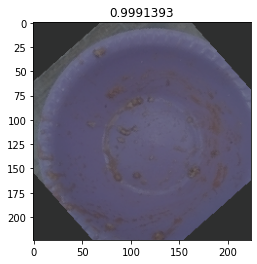

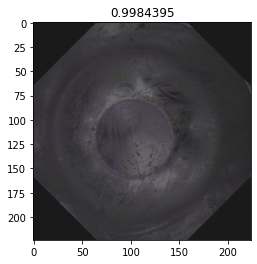

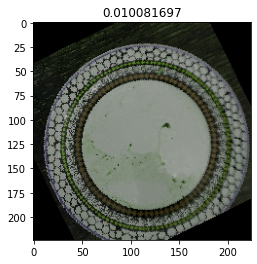

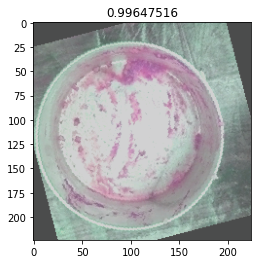

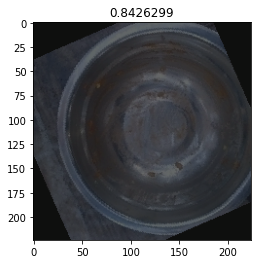

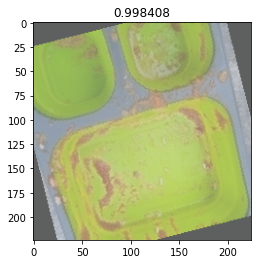

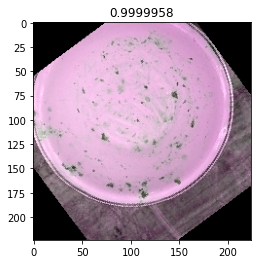

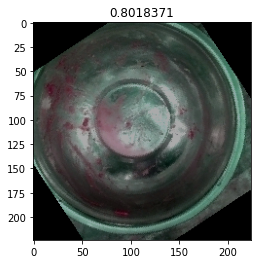

In [192]:
inputs, labels, paths = next(iter(test_dataloader))

# for inputs, labels, paths in iter(test_dataloader):
for img, pred in zip(inputs, test_predictions):
    show_input(img, title=pred)

In [198]:
submission_df = pd.DataFrame.from_dict({'id': test_img_paths, 'label': test_predictions})

In [199]:
submission_df

,id,label
0,/kaggle/working/test/unknown/0000.jpg,0.999139
1,/kaggle/working/test/unknown/0001.jpg,0.998439
2,/kaggle/working/test/unknown/0002.jpg,0.010082
3,/kaggle/working/test/unknown/0003.jpg,0.996475
4,/kaggle/working/test/unknown/0004.jpg,0.842630
...,...,...
739,/kaggle/working/test/unknown/0739.jpg,0.992668
740,/kaggle/working/test/unknown/0740.jpg,0.992799
741,/kaggle/working/test/unknown/0741.jpg,0.010527
742,/kaggle/working/test/unknown/0742.jpg,0.542249


In [200]:
submission_df['label'] = submission_df['label'].map(lambda pred: 'dirty' if pred > 0.5 else 'cleaned')
submission_df['id'] = submission_df['id'].str.replace('/kaggle/working/test/unknown/', '')
submission_df['id'] = submission_df['id'].str.replace('.jpg', '')
submission_df.set_index('id', inplace=True)
submission_df.head(n=6)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,label
id,
0000,dirty
0001,dirty
0002,cleaned
0003,dirty
0004,dirty
0005,dirty


In [201]:
submission_df.describe()

,label
count,744
unique,2
top,dirty
freq,554


In [202]:
submission_df.to_csv('submission.csv')


0 3 4

In [161]:

!rm -rf train val test


In [162]:
import csv

with open('submission.csv', encoding='utf8') as file:
    reader = csv.reader(file)
    print(*reader)

['id', 'label'] ['0000', 'dirty'] ['0001', 'cleaned'] ['0002', 'cleaned'] ['0003', 'dirty'] ['0004', 'cleaned'] ['0005', 'dirty'] ['0006', 'dirty'] ['0007', 'dirty'] ['0008', 'dirty'] ['0009', 'cleaned'] ['0010', 'dirty'] ['0011', 'dirty'] ['0012', 'cleaned'] ['0013', 'dirty'] ['0014', 'cleaned'] ['0015', 'dirty'] ['0016', 'dirty'] ['0017', 'dirty'] ['0018', 'dirty'] ['0019', 'cleaned'] ['0020', 'dirty'] ['0021', 'dirty'] ['0022', 'dirty'] ['0023', 'dirty'] ['0024', 'cleaned'] ['0025', 'dirty'] ['0026', 'cleaned'] ['0027', 'cleaned'] ['0028', 'cleaned'] ['0029', 'dirty'] ['0030', 'cleaned'] ['0031', 'dirty'] ['0032', 'dirty'] ['0033', 'dirty'] ['0034', 'dirty'] ['0035', 'dirty'] ['0036', 'cleaned'] ['0037', 'cleaned'] ['0038', 'dirty'] ['0039', 'dirty'] ['0040', 'dirty'] ['0041', 'dirty'] ['0042', 'dirty'] ['0043', 'dirty'] ['0044', 'dirty'] ['0045', 'dirty'] ['0046', 'dirty'] ['0047', 'dirty'] ['0048', 'dirty'] ['0049', 'dirty'] ['0050', 'dirty'] ['0051', 'dirty'] ['0052', 'dirty'] ['